In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2025/players.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2025/games.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2025/player_play.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2025/plays.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv


Insights on games file****

In [2]:
# Import libraries
import pandas as pd
import numpy as np
# Libraries related to plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Library for missing values visual
import missingno as msno

In [3]:
# Read all the files
df_games = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/games.csv")
df_playerplays = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/player_play.csv")
df_players = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/players.csv")
df_plays = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/plays.csv")
df_trackingweek1 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv")
df_trackingweek2 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv")
#df_trackingweek3 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv")
#df_trackingweek4 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv")
#df_trackingweek5 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv")
#df_trackingweek6 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv")
#df_trackingweek7 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv")
#df_trackingweek8 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv")
#df_trackingweek9 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv")

**UNDERSTAND THE GAME DATA** 

In [4]:
# Read few rows of each dataframe, to better understand the data
df_games.head(3)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26


In [5]:
# Descriptive analysis like min, max etc info
df_games.describe()

,gameId,season,week,homeFinalScore,visitorFinalScore
count,1.360000e+02,136.0,136.000000,136.000000,136.000000
mean,2.022099e+09,2022.0,4.845588,22.669118,20.948529
std,5.996614e+03,0.0,2.567254,8.659874,9.731446
min,2.022091e+09,2022.0,1.000000,3.000000,0.000000
25%,2.022093e+09,2022.0,3.000000,17.000000,14.750000
50%,2.022101e+09,2022.0,5.000000,22.500000,20.000000
75%,2.022102e+09,2022.0,7.000000,27.000000,27.000000
max,2.022111e+09,2022.0,9.000000,49.000000,48.000000


In [6]:
# Get data types, null/not null, clean data with no null, no need for further manipulations
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB


In [7]:
# Calculate the total number of missing values for each feature
missing_values = df_games.isnull().sum()
missing_values

gameId               0
season               0
week                 0
gameDate             0
gameTimeEastern      0
homeTeamAbbr         0
visitorTeamAbbr      0
homeFinalScore       0
visitorFinalScore    0
dtype: int64

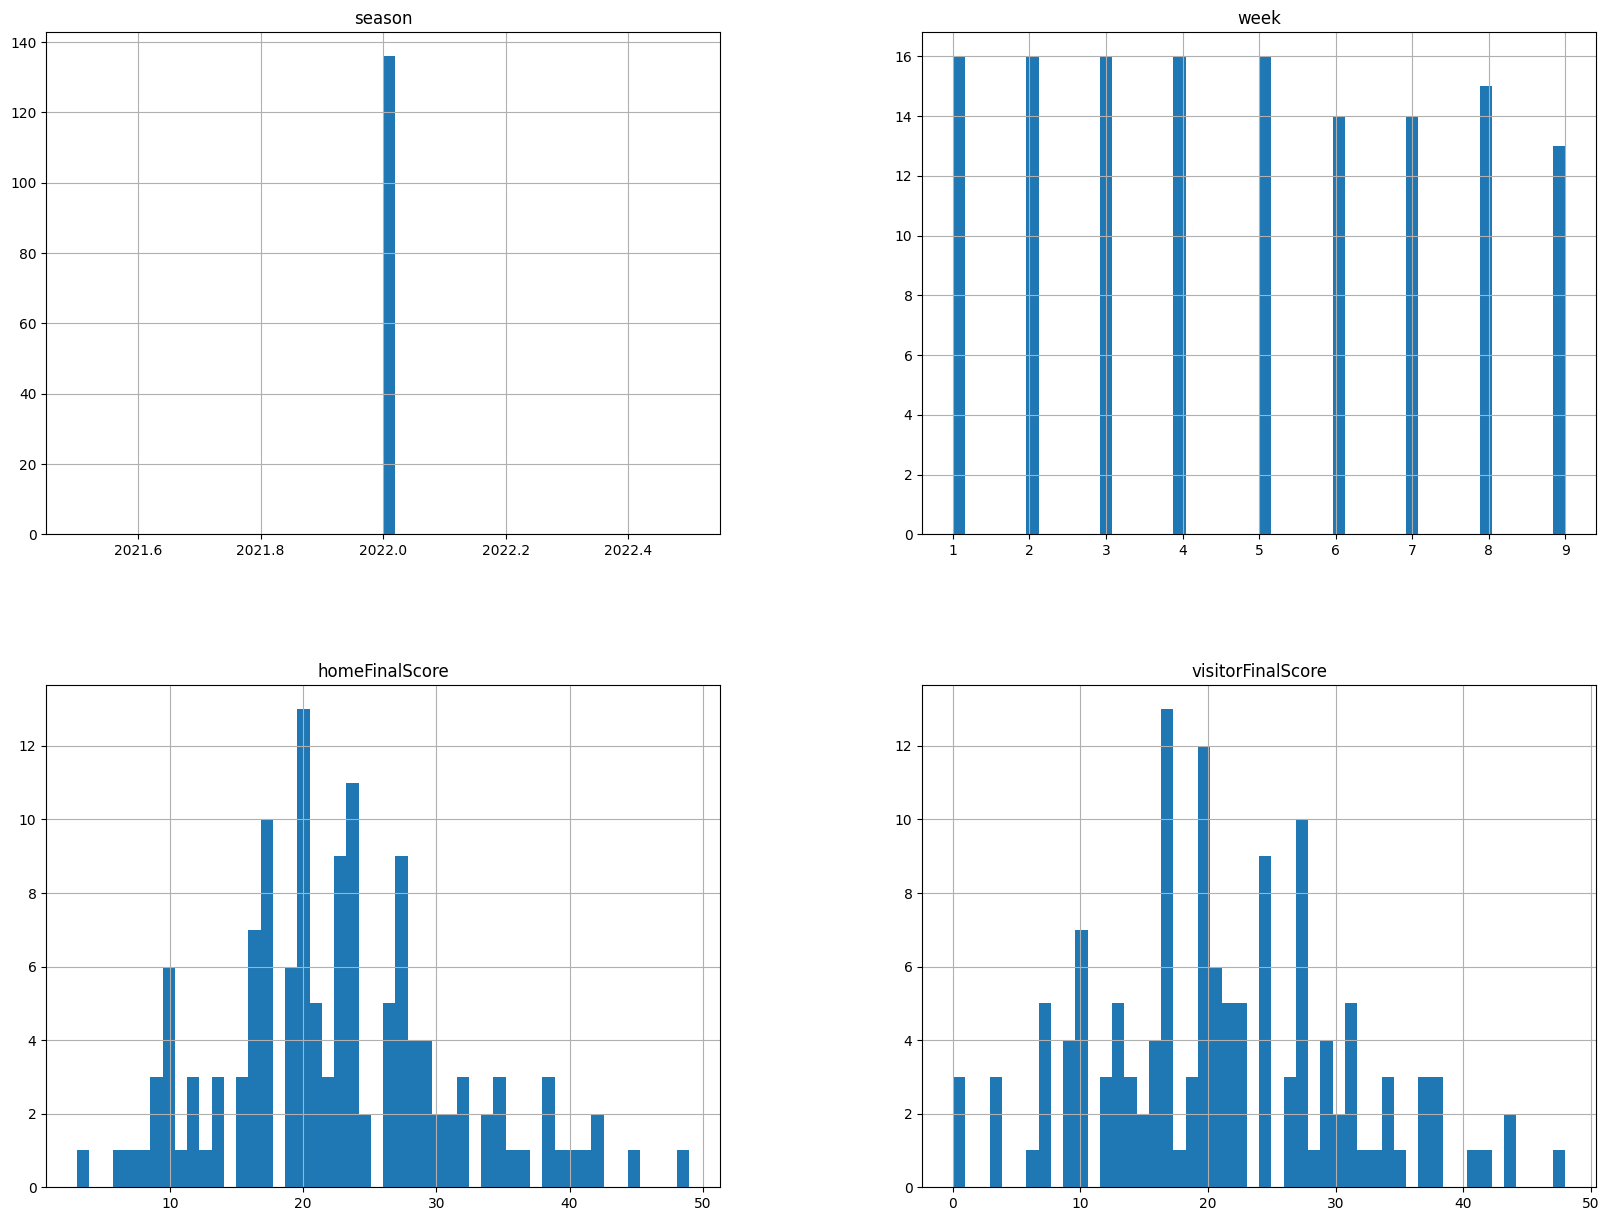

In [8]:
# Show data distribution, so give more insights
cols_to_exclude = ["gameId"]
df_filtered = df_games.drop(columns=cols_to_exclude)
df_filtered.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
# Check unique values of fields
df_games["season"].value_counts()

season
2022    136
Name: count, dtype: int64

In [10]:
df_games["week"].value_counts()

week
1    16
2    16
3    16
4    16
5    16
8    15
6    14
7    14
9    13
Name: count, dtype: int64

In [11]:
# Different teams and number of games played for home team
df_games["homeTeamAbbr"].value_counts()

# use this to sort the field .sort_index()

homeTeamAbbr
NO     6
LA     5
WAS    5
JAX    5
CLE    5
ATL    5
DAL    5
ARI    5
TB     5
NYJ    5
DET    5
CAR    5
MIN    4
MIA    4
NE     4
IND    4
PHI    4
GB     4
DEN    4
NYG    4
KC     4
CHI    4
CIN    4
BAL    4
LAC    4
SEA    4
HOU    4
TEN    3
SF     3
LV     3
BUF    3
PIT    3
Name: count, dtype: int64

In [12]:
# Different teams and number of games played for visitor team
df_games["visitorTeamAbbr"].value_counts()

visitorTeamAbbr
BUF    5
BAL    5
MIA    5
SEA    5
CIN    5
GB     5
LV     5
CHI    5
NE     5
IND    5
TEN    5
PIT    5
SF     5
WAS    4
ARI    4
HOU    4
ATL    4
MIN    4
CAR    4
LAC    4
NYJ    4
DEN    4
TB     4
NYG    4
KC     4
JAX    4
PHI    4
NO     3
CLE    3
DET    3
LA     3
DAL    3
Name: count, dtype: int64

In [13]:
# Show all records of NO games
NO_games = df_games[df_games["homeTeamAbbr"] == "NO"]
print(NO_games)

         gameId  season  week    gameDate gameTimeEastern homeTeamAbbr  \
21   2022091804    2022     2   9/18/2022        13:00:00           NO   
49   2022100200    2022     4   10/2/2022         9:30:00           NO   
71   2022100906    2022     5   10/9/2022        13:00:00           NO   
86   2022101605    2022     6  10/16/2022        13:00:00           NO   
114  2022103006    2022     8  10/30/2022        13:00:00           NO   
135  2022110700    2022     9   11/7/2022        20:15:00           NO   

    visitorTeamAbbr  homeFinalScore  visitorFinalScore  
21               TB              10                 20  
49              MIN              25                 28  
71              SEA              39                 32  
86              CIN              26                 30  
114              LV              24                  0  
135             BAL              13                 27  


In [14]:
# min_date and max_Date
# make sure the date is in datetime format
df_games["gameDate"] = pd.to_datetime(df_games["gameDate"])
min_date = df_games["gameDate"].min()
max_date = df_games["gameDate"].max()

print(f"Min Date: {min_date}, Max Date: {max_date}")

Min Date: 2022-09-08 00:00:00, Max Date: 2022-11-07 00:00:00


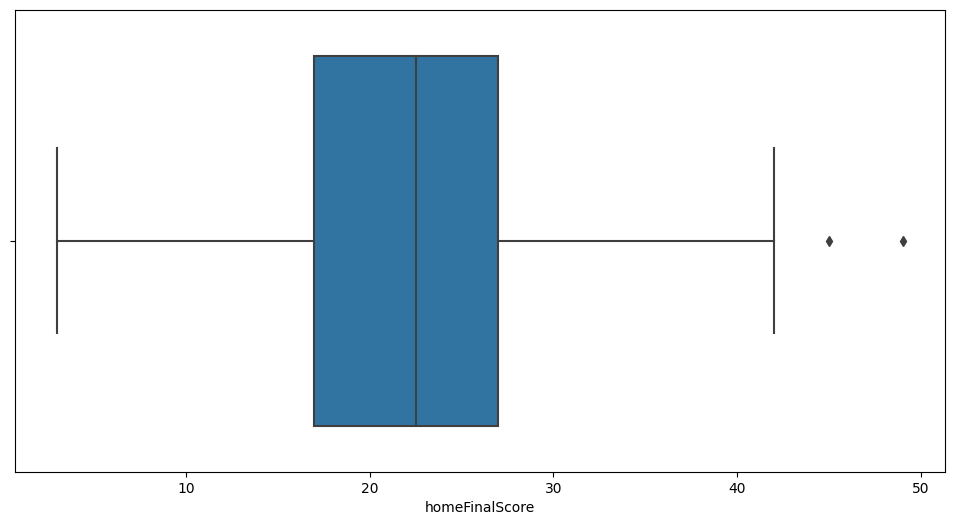

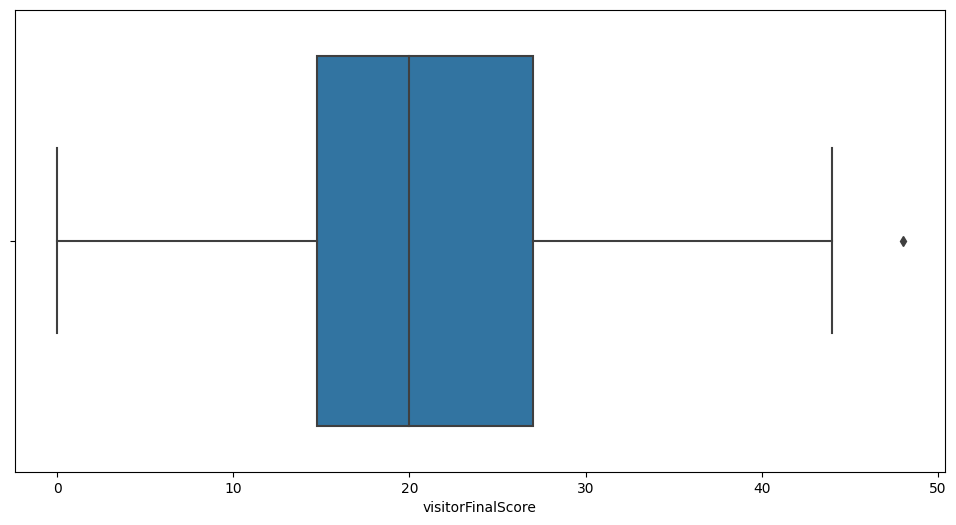

In [15]:
# Check for outliers using box plot
continous_features =[col for col in df_games.select_dtypes(include=['number']).columns
                    if col not in ['gameId', 'week', 'season']]

for i in continous_features:
    fig,  ax = plt.subplots()
    fig.set_size_inches(12, 6)
    sns.boxplot(x=i,data=df_games,ax=ax)

In [16]:
# finding correlation between vars
# Create a new dataframe
continuous_df = df_games[continous_features]
correlation = continuous_df.corr()
correlation

,homeFinalScore,visitorFinalScore
homeFinalScore,1.000000,0.151332
visitorFinalScore,0.151332,1.000000


Text(0.5, 1.0, 'Correlation matrix for the Games')

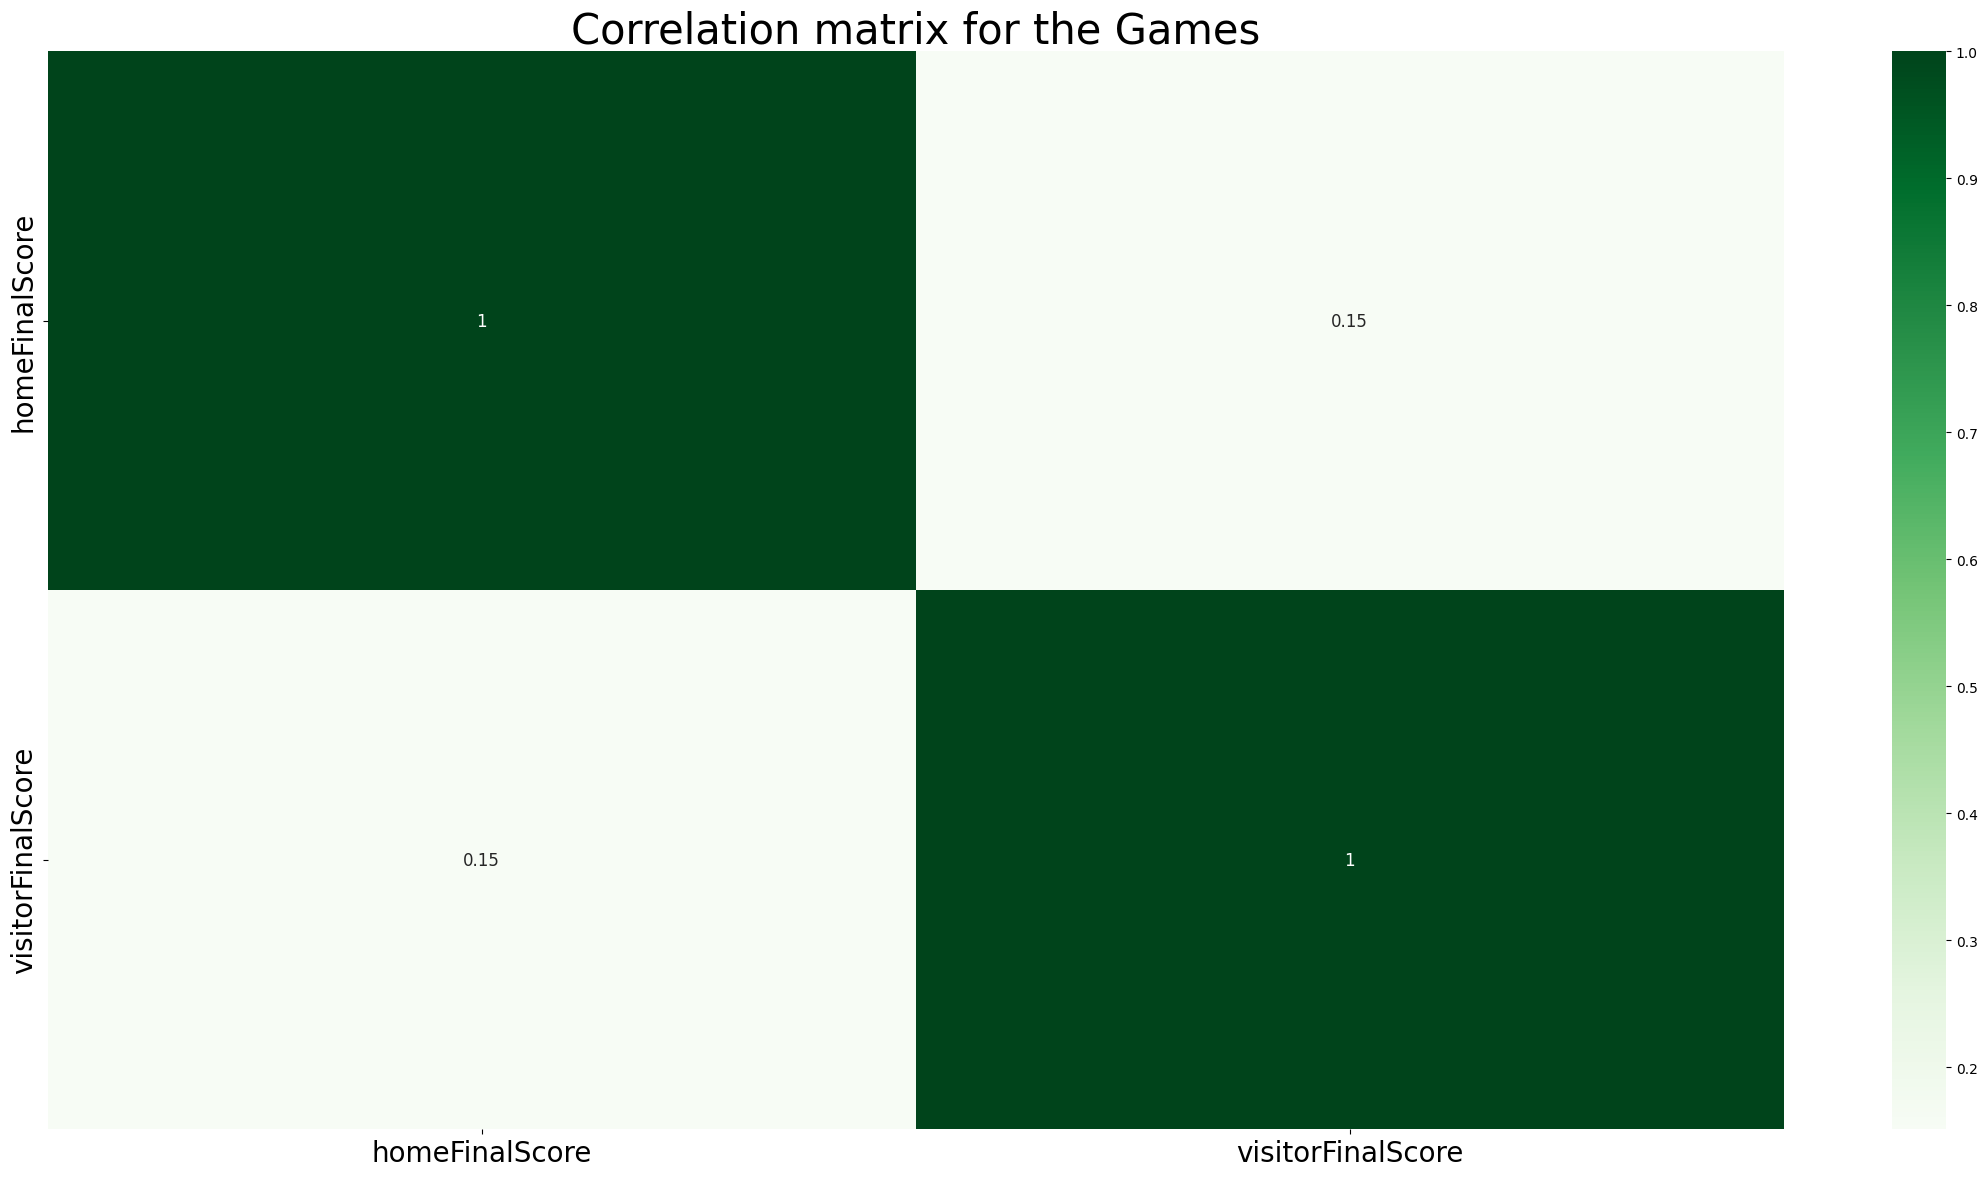

In [17]:
plt.figure(figsize=(28,14))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(correlation, cmap="Greens", annot=True, annot_kws={'size':12})
plt.title("Correlation matrix for the Games", fontsize=30)

# Analysis on the games.csv file
1. There are 136 entries 
2. The data is for season's year 2022 only, about 2 years old
3. The data is clean in terms of no missing values
4. Only week 1 through 5 have 16 games, rest of the weeks have less than 16 games
5. The distribution of home and visitor scores is distrubted evenly
6. The games are played between 2022-09-08 and 2022-11-07
7. There are 32 teams, all teams in NFL played at least once as home team, with NO having played 6 games, and PIT played 3 games
8. There are 32 teams, all teams in NFL played at least once as visitor team, with BUF having played 5 games, and DAL played 3 games
9. For the homeFinalScore, number of outliers is 2; for visitorFinalScore number of outliers is 1
10. The correlation between homeFinalScore and visitorFinalScore is 0.15 which indicates a very weak positive correlation, suggesting the scores of home and visitor games are only slightly related

**UNDERSTAND THE PLAYERS AND PLAYS DATA** 

In [18]:
df_players.head(3)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers


In [19]:
df_players.describe()

,nflId,weight
count,1697.000000,1697.000000
mean,48237.157336,245.774308
std,5230.066814,47.256005
min,25511.000000,153.000000
25%,44830.000000,205.000000
50%,47874.000000,236.000000
75%,53476.000000,291.000000
max,55241.000000,380.000000


In [20]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1697 non-null   int64 
 1   height       1697 non-null   object
 2   weight       1697 non-null   int64 
 3   birthDate    1210 non-null   object
 4   collegeName  1697 non-null   object
 5   position     1697 non-null   object
 6   displayName  1697 non-null   object
dtypes: int64(2), object(5)
memory usage: 92.9+ KB


## Data Preprocessing Players data##

In [21]:
# convert the height into inches and add to dataframe
df_players["heightinches"] = df_players['height'].apply(lambda x:int(x.split('-')[0]) *12 + int(x.split('-')[1]))

In [22]:
# Since the birthDate exist in different formats, format it
df_players['birthDate'] = pd.to_datetime(df_players['birthDate'], format='mixed', errors='coerce')

# Find the age of players
today = pd.Timestamp.now()
df_players['age'] = (today - df_players['birthDate']).dt.days //365

<Axes: >

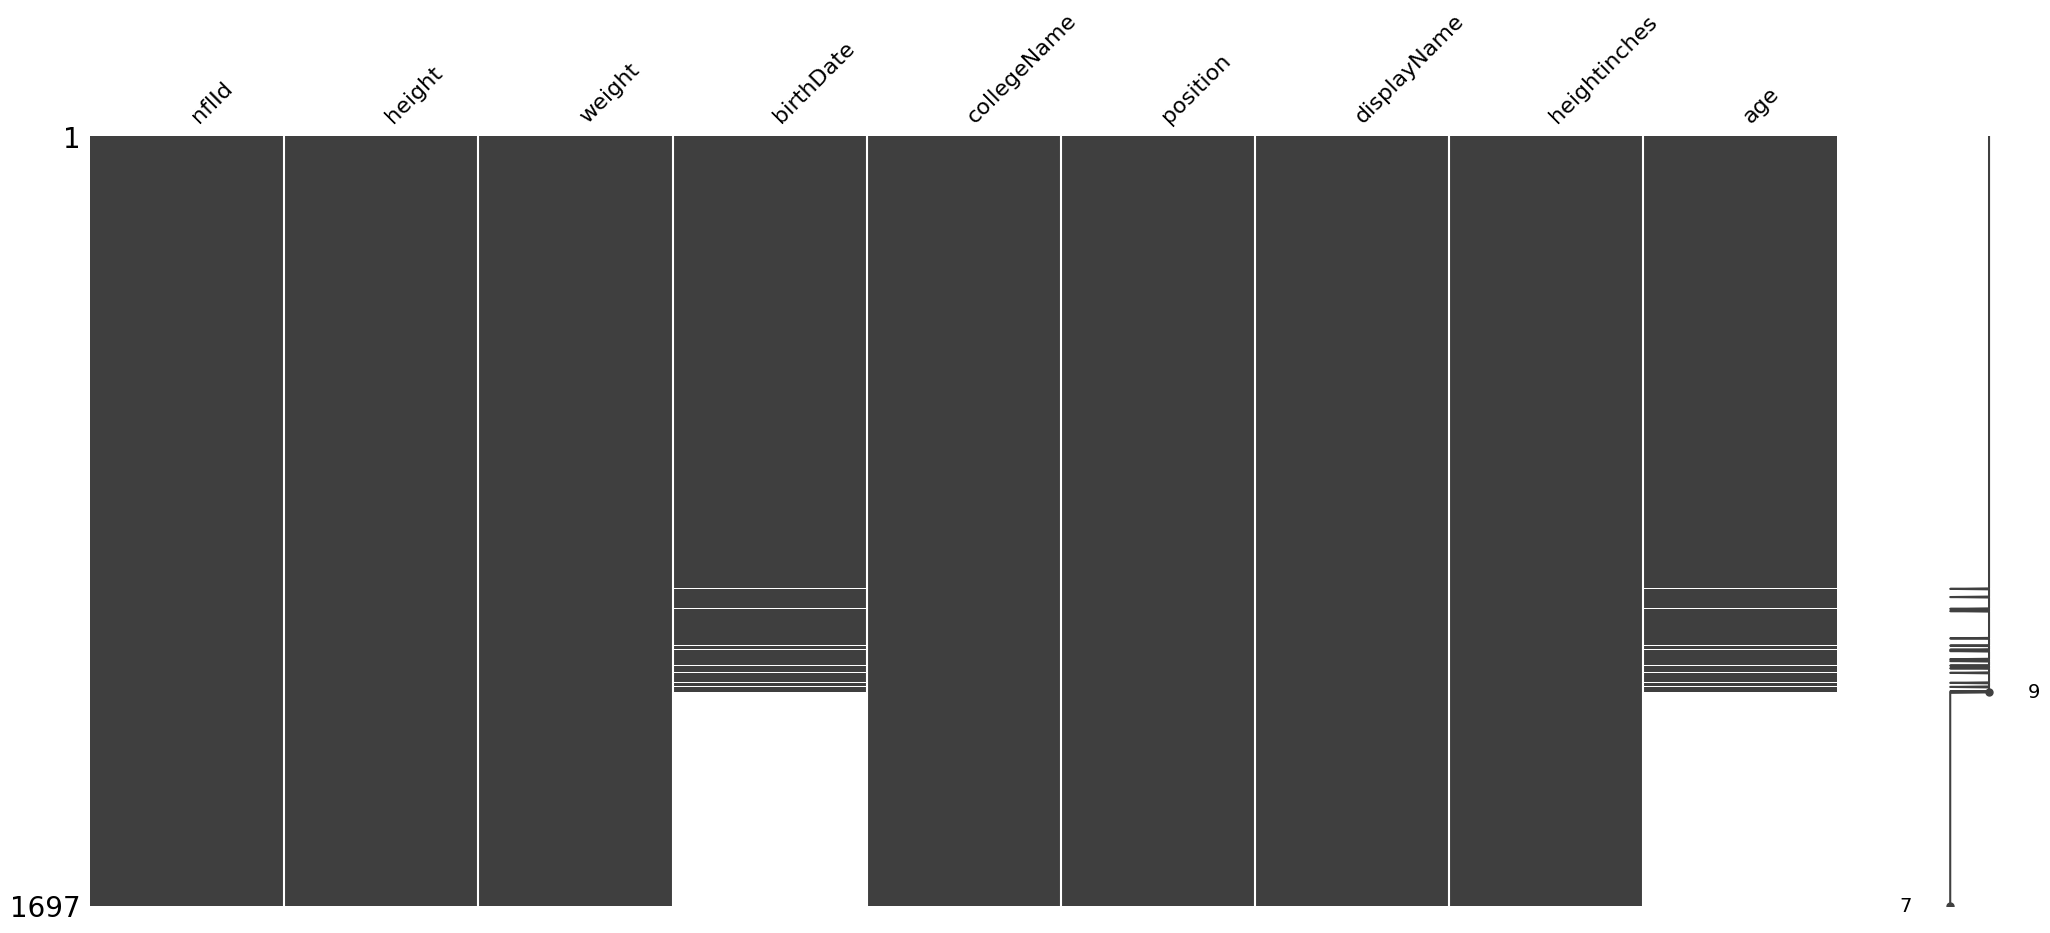

In [23]:
# Data cleansing activity for the birthdate info
# Display the nans in a matrix
msno.matrix(df_players)

In [24]:
# Find the median age of players, and fill missing values with this
median_age = df_players['age'].median()

df_players['age'] = df_players['age'].fillna(median_age).astype(int)

<Axes: >

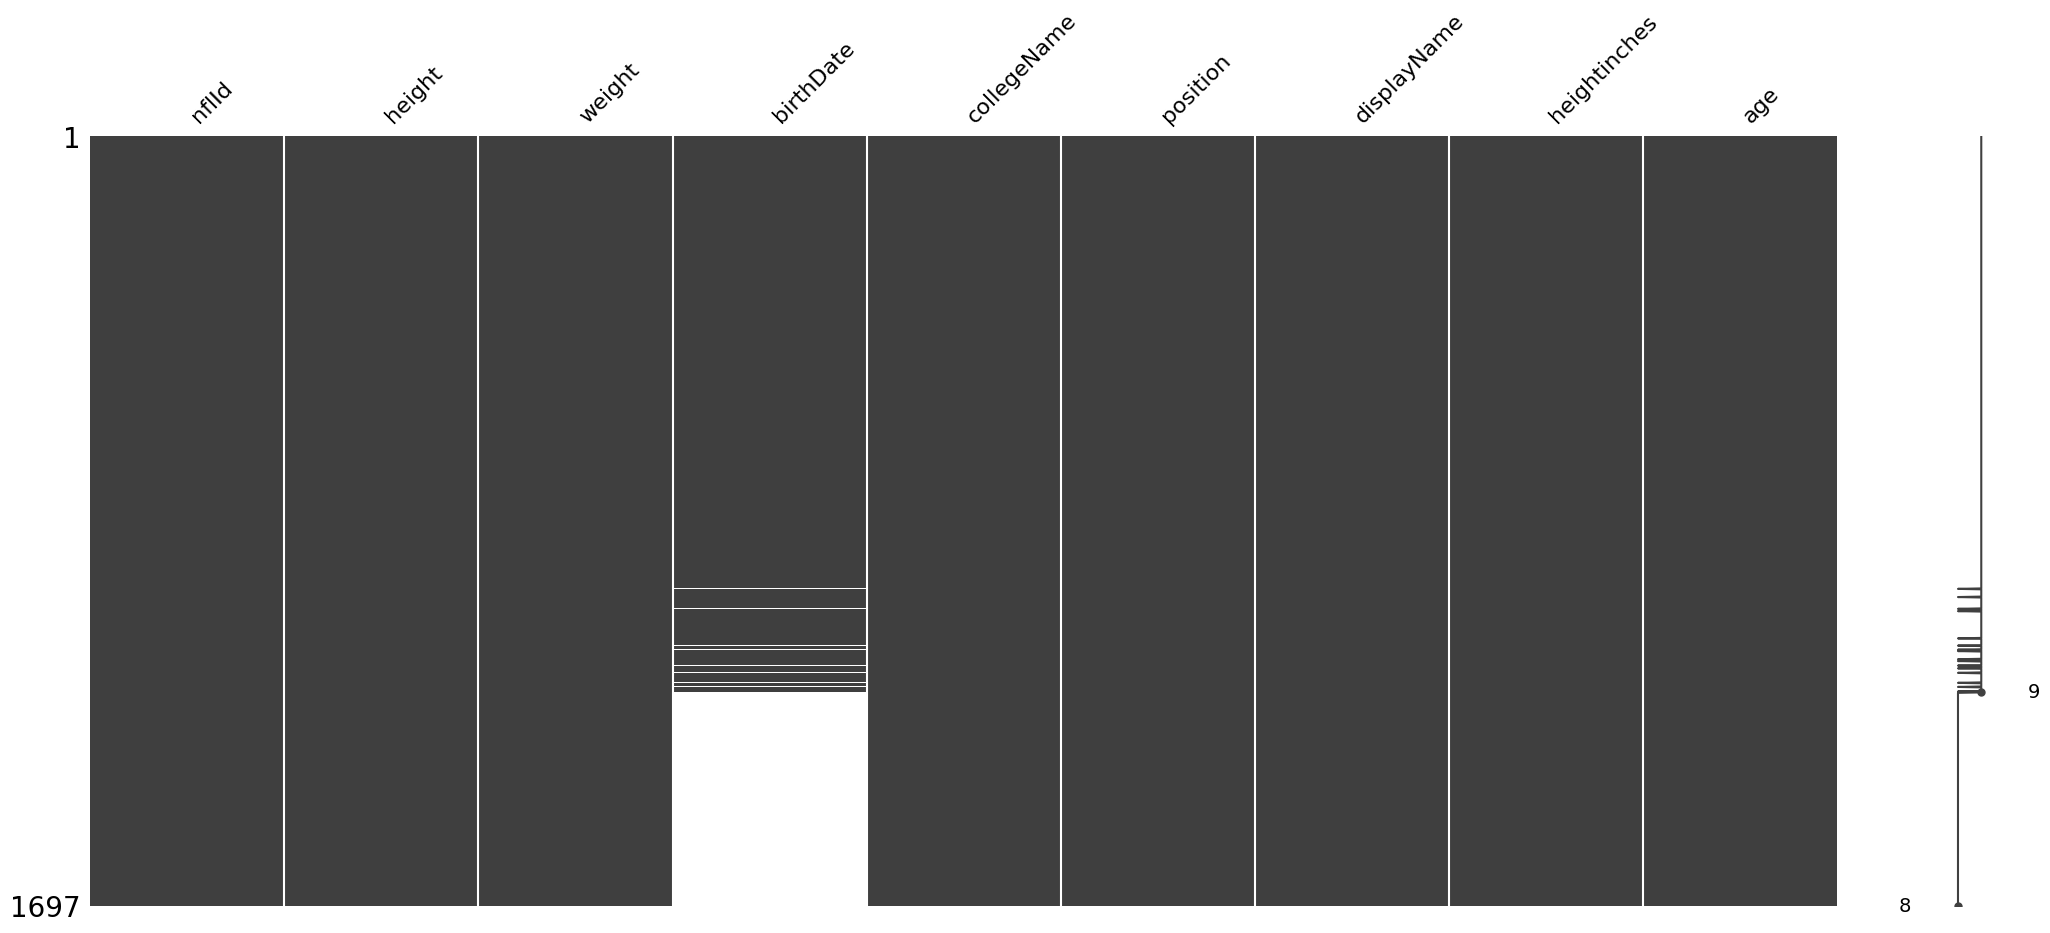

In [25]:
# Display matrix, age is doesnot have any null values
msno.matrix(df_players)

In [26]:
# Number of players in the positions and the meanings of the positions
df_players['position'].value_counts()

position
WR     224
CB     189
OLB    135
DE     131
RB     126
TE     123
DT     121
T      117
G      107
ILB     93
FS      79
SS      65
QB      62
C       61
NT      32
MLB     16
FB      14
DB       1
LB       1
Name: count, dtype: int64

WR (Wide Receiver): Catches passes from the quarterback and gains yards.<br>
CB (Cornerback): Defends against passes and covers wide receivers.<br>
OLB (Outside Linebacker): Tackles runners, defends passes, and rushes the quarterback.<br>
DE (Defensive End): Tackles running backs and pressures the quarterback from the edge.<br>
RB (Running Back): Runs the ball, catches passes, and blocks defenders.<br>
TE (Tight End): Catches passes and blocks for the running game.<br>
DT (Defensive Tackle): Stops the run and pressures the quarterback up the middle.<br>
T (Tackle): Blocks defenders to protect the quarterback and create running lanes.<br>
G (Guard): Protects the quarterback and creates running lanes inside.<br>
ILB (Inside Linebacker): Tackles runners, defends passes, and leads the defense.<br>
FS (Free Safety): Covers deep passes and supports cornerbacks in pass defense.<br>
SS (Strong Safety): Tackles runners and covers short to mid-range passes.<br>
QB (Quarterback): Directs the offense, throws passes, and makes play decisions.<br>
C (Center): Snaps the ball to the quarterback and blocks defenders.<br>
NT (Nose Tackle): Anchors the defensive line in the middle, stopping runs.<br>
MLB (Middle Linebacker): Similar to ILB, a key defensive leader and tackler.<br>
FB (Fullback): Blocks for the running back and occasionally runs or catches passes.<br>
DB (Defensive Back): General term for players covering receivers (CB, FS, SS).<br>
LB (Linebacker): General term for defensive players stopping runs and defending passes.<br>

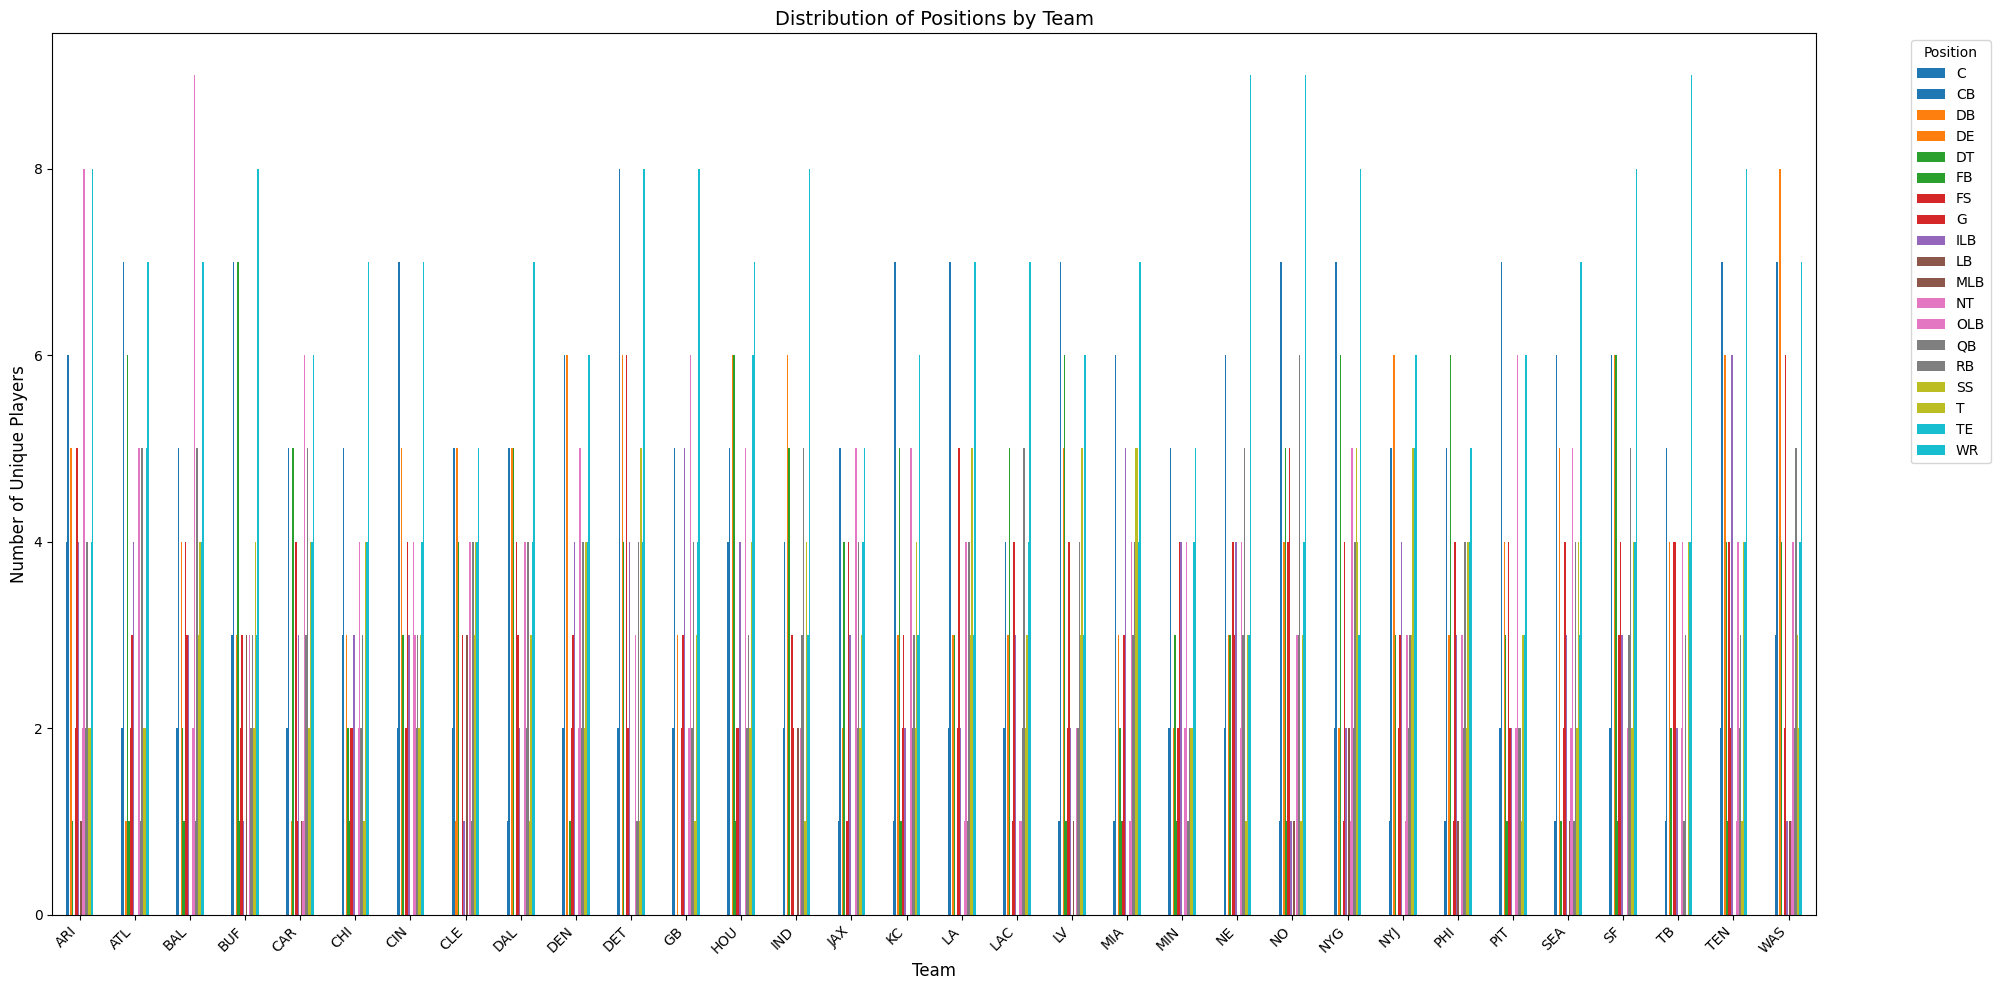

In [27]:
# See the distribution of positions as per the team
# Get only the unique team players, since the players data doesn't have team name info

unique_plays = df_playerplays[['nflId', 'teamAbbr']].drop_duplicates(subset='nflId')

positions = pd.merge(df_players, unique_plays, on='nflId', how='left')

# Group by team and position, counting unique plays
position_distribution = positions.groupby(['teamAbbr', 'position'])['nflId'].nunique()

# data frame is set up for visualization
# resets the grouped data into a DataFrame and pivots it to prepare for plotting.
position_distribution_df = position_distribution.reset_index(name='unique_player_count')

# Pivot the data for visualization
pivoted_data = position_distribution_df.pivot(index='teamAbbr', columns='position', values='unique_player_count')

# Plotting the bar chart
pivoted_data.plot(
    kind='bar',
    figsize=(20, 10),
    stacked=False,
    colormap='tab10'
)

# Add labels, title, and legend
plt.title('Distribution of Positions by Team', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Unique Players', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
# # Group by position and team, count players to see how some teams structure the players roaster
# Get the maximum number of players for each position

position_counts = positions.groupby(['position', 'teamAbbr'])['nflId'].nunique()

# Find the team with the maximum count for each position
max_team_per_position = position_counts.groupby('position').idxmax()

# Create a DataFrame for better readability
result = position_counts.loc[max_team_per_position].reset_index(name='unique_player_count')

# Sort by team abbreviation for better readability
result = result.sort_values(by='teamAbbr').reset_index(drop=True)

# Display the result
print(result)

   position teamAbbr  unique_player_count
0         C      ARI                    4
1        FB      ATL                    1
2       OLB      BAL                    9
3        DT      BUF                    7
4       MLB      BUF                    3
5        QB      CAR                    3
6        NT      CIN                    4
7        DB      CLE                    1
8        CB      DET                    8
9         T      DET                    5
10       FS      DET                    6
11       TE      HOU                    6
12       SS      MIA                    5
13       WR       NE                    9
14       RB       NO                    6
15       LB      PHI                    1
16      ILB      TEN                    6
17        G      WAS                    6
18       DE      WAS                    8


In [29]:
df_players.describe()

,nflId,weight,birthDate,heightinches,age
count,1697.000000,1697.000000,1210,1697.000000,1697.000000
mean,48237.157336,245.774308,1995-01-10 03:12:47.603305856,74.255745,29.344137
min,25511.000000,153.000000,1977-08-03 00:00:00,66.000000,25.000000
25%,44830.000000,205.000000,1993-06-14 06:00:00,72.000000,28.000000
50%,47874.000000,236.000000,1995-08-04 00:00:00,75.000000,29.000000
75%,53476.000000,291.000000,1997-01-14 18:00:00,76.000000,30.000000
max,55241.000000,380.000000,1999-11-27 00:00:00,81.000000,47.000000
std,5230.066814,47.256005,NaN,2.647646,2.346342


In [30]:
positions.head(3)

,nflId,height,weight,birthDate,collegeName,position,displayName,heightinches,age,teamAbbr
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,76,47,TB
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,76,42,DAL
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,74,41,GB


In [31]:
# avg height, weight and age of each position, by each team
avg_stats_by_position = positions.groupby('position')[['heightinches', 'weight', 'age']].mean()

avg_stats_by_position = avg_stats_by_position.reset_index()

print(avg_stats_by_position.round(2))

   position  heightinches  weight    age
0         C         75.93  305.16  29.84
1        CB         71.88  193.05  28.87
2        DB         75.00  214.00  27.00
3        DE         75.90  272.58  29.66
4        DT         75.28  306.16  29.40
5        FB         72.86  248.14  29.86
6        FS         72.16  202.87  29.19
7         G         76.49  314.07  29.24
8       ILB         73.65  235.01  29.11
9        LB         77.00  253.00  27.00
10      MLB         73.75  233.88  28.88
11       NT         75.22  322.88  29.78
12      OLB         75.19  248.43  29.33
13       QB         74.69  220.50  31.55
14       RB         70.98  214.33  28.70
15       SS         72.11  203.65  29.28
16        T         77.92  316.57  29.96
17       TE         76.63  248.93  29.33
18       WR         72.75  199.16  29.02


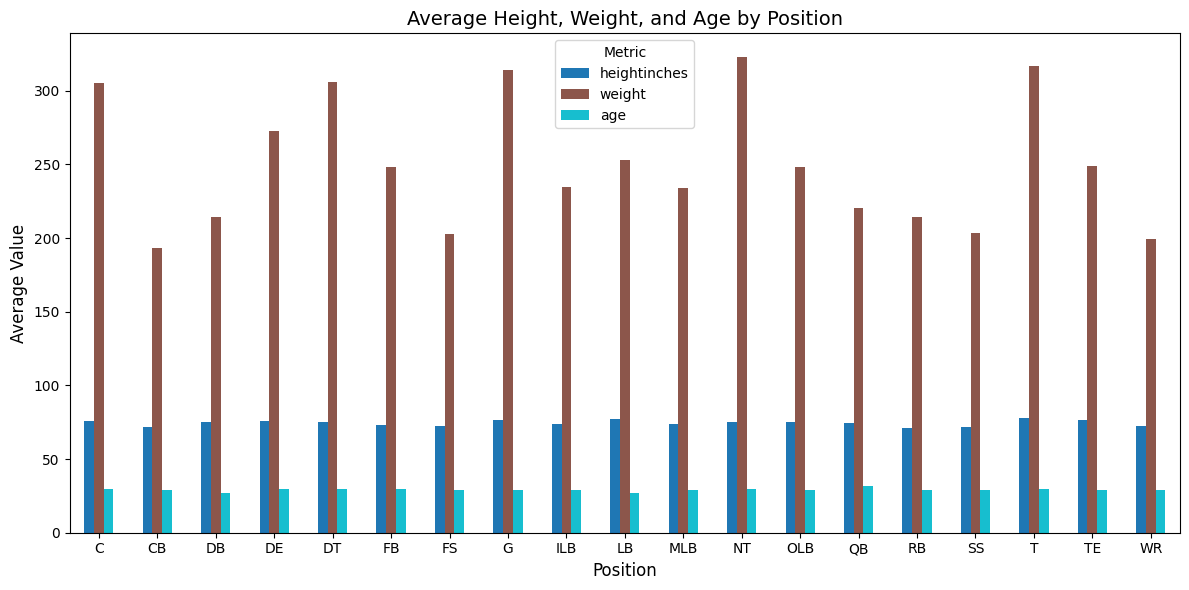

In [32]:
# Plotting the bar graph
avg_stats_by_position.set_index('position').plot(
    kind='bar',
    figsize=(12, 6),
    colormap='tab10'
)

# Adding labels and title
plt.title('Average Height, Weight, and Age by Position', fontsize=14)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [33]:
# Group by team and calculate the averages
average_stats_by_team = positions.groupby('teamAbbr')[['heightinches', 'weight', 'age']].mean().reset_index()

# Find the team with the highest and lowest values for each metric
highest_values = average_stats_by_team.loc[average_stats_by_team[['heightinches', 'weight', 'age']].idxmax()]
lowest_values = average_stats_by_team.loc[average_stats_by_team[['heightinches', 'weight', 'age']].idxmin()]

# Display the results
print("Team with the highest values:")
print(highest_values)

print("\nTeam with the lowest values:")
print(lowest_values)

Team with the highest values:
   teamAbbr  heightinches      weight        age
7       CLE     74.755102  245.326531  28.653061
27      SEA     73.941176  250.274510  29.490196
29       TB     74.469388  249.244898  30.040816

Team with the lowest values:
   teamAbbr  heightinches      weight        age
21       NE     73.745455  244.563636  29.945455
10      DET     74.206897  239.724138  28.431034
10      DET     74.206897  239.724138  28.431034


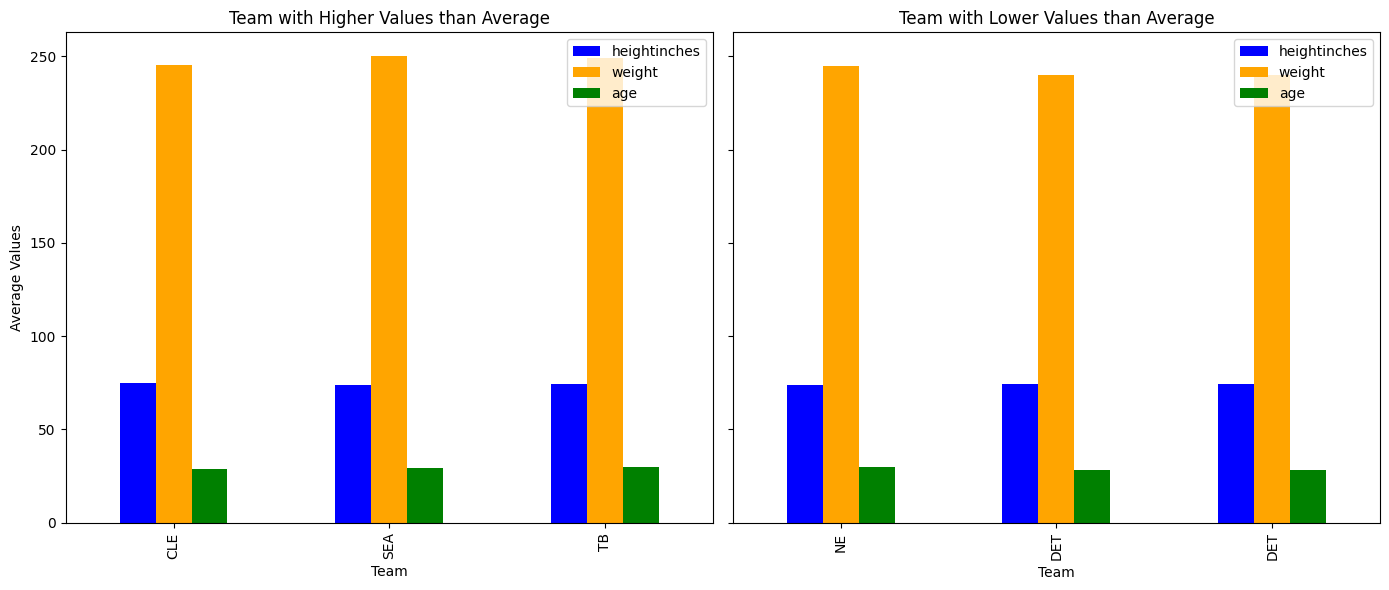

In [34]:
# Group by team and calculate the averages
average_stats_by_team = positions.groupby('teamAbbr')[['heightinches', 'weight', 'age']].mean().reset_index()

# Find the team with the highest and lowest values for each metric
highest_values = average_stats_by_team.loc[average_stats_by_team[['heightinches', 'weight', 'age']].idxmax()]
lowest_values = average_stats_by_team.loc[average_stats_by_team[['heightinches', 'weight', 'age']].idxmin()]

# Plot the teams with the highest and lowest values as a bar graph
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot highest values
highest_values.set_index('teamAbbr')[['heightinches', 'weight', 'age']].plot(
    kind='bar',
    ax=axes[0],
    color=['blue', 'orange', 'green'],
    title='Team with Higher Values than Average'
)

# Plot lowest values
lowest_values.set_index('teamAbbr')[['heightinches', 'weight', 'age']].plot(
    kind='bar',
    ax=axes[1],
    color=['blue', 'orange', 'green'],
    title='Team with Lower Values than Average'
)

# Set common labels and layout
axes[0].set_ylabel('Average Values')
axes[0].set_xlabel('Team')
axes[1].set_xlabel('Team')
plt.tight_layout()

# Show the plot
plt.show()


In [35]:
min_age_record = df_players[df_players['age']==25]
print(min_age_record['age'].value_counts())

age
25    29
Name: count, dtype: int64


In [36]:
max_age_record = df_players[df_players['age']==47]
#print(max_age_record['age'].value_counts())
print(max_age_record)

   nflId height  weight  birthDate collegeName position displayName  \
0  25511    6-4     225 1977-08-03    Michigan       QB   Tom Brady   

   heightinches  age  
0            76   47  


# **Analysis on the players
1. There are 1697 entries
2. Only birthdate has 1210 entries, rest are null, 28.7% of null entries
3. Convert the height to inches, currently stored as feet and inches; the minimum height is 5-6, and maximum is 6-9 with typical deviation of 2.64 inches
4. The minimum weight is 153 pounds, and maximum weight is 380 pounds with typical deviation of 47.26 pounds
5. There are 19 different positions in each team, one player can play only one position
6. The minimum age is 25, average age is 29.3, maximum age is 47; most players are in late 20s to early 30s with typical deviation of 2.34 years
7. There are 25 players whose age is 25; Tom Brady is the oldest player in the data, although he has currently retired
8. Teams with higher than average height, weight and age is CLE, SEA, TB and teams with lower than average height, weight and age is NE, DET. Using the average values, especially for weight some of the team managers can work with the players to make sure they are within the optimum weight for best performance on the field

# Data preprocessing on the players plays

In [37]:
df_playerplays.describe()

,gameId,playId,nflId,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,receivingYards,...,timeToPressureAsPassRusher,getOffTimeAsPassRusher,wasRunningRoute,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
count,3.547270e+05,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,...,4328.000000,48032.000000,42779.0,49104.000000,4373.000000,7.000000,53044.000000,4080.000000,43484.000000,2387.000000
mean,2.022099e+09,2023.833091,47437.201033,0.019136,0.087304,0.017571,0.173268,-0.011471,0.015857,0.173373,...,2.866382,1.013016,1.0,46503.634694,49704.308027,49423.428571,0.076917,2.938971,47937.557078,47982.880184
std,5.979081e+03,1182.056487,5167.218156,0.137003,1.098183,0.131387,1.840473,0.309496,0.124923,1.841174,...,1.029087,0.298124,0.0,5105.945879,4056.385738,3275.463471,0.266463,0.989947,4696.183053,4603.065248
min,2.022091e+09,54.000000,25511.000000,0.000000,-10.000000,0.000000,-10.000000,-18.000000,0.000000,-11.000000,...,0.800000,0.004000,1.0,33131.000000,35454.000000,46269.000000,0.000000,0.800000,29550.000000,30842.000000
25%,2.022093e+09,996.000000,43426.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.200000,0.801000,1.0,43316.000000,46204.000000,47786.500000,0.000000,2.300000,44841.000000,44860.000000
50%,2.022101e+09,2017.000000,46457.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.700000,0.961000,1.0,46141.000000,48198.000000,47944.000000,0.000000,2.700000,47791.000000,46705.000000
75%,2.022102e+09,3022.000000,52590.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.225000,1.171000,1.0,52448.000000,53501.000000,50722.500000,0.000000,3.300000,52608.000000,52644.500000
max,2.022111e+09,5120.000000,55241.000000,1.000000,75.000000,1.000000,98.000000,0.000000,1.000000,98.000000,...,11.600000,2.000000,1.0,55241.000000,55239.000000,54733.000000,1.000000,11.600000,55168.000000,55157.000000


In [38]:
df_playerplays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354727 entries, 0 to 354726
Data columns (total 50 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   gameId                                      354727 non-null  int64  
 1   playId                                      354727 non-null  int64  
 2   nflId                                       354727 non-null  int64  
 3   teamAbbr                                    354727 non-null  object 
 4   hadRushAttempt                              354727 non-null  int64  
 5   rushingYards                                354727 non-null  int64  
 6   hadDropback                                 354727 non-null  int64  
 7   passingYards                                354727 non-null  int64  
 8   sackYardsAsOffense                          354727 non-null  int64  
 9   hadPassReception                            354727 non-null  int64  
 

In [39]:
df_playerplays.head(3)

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
0,2022090800,56,35472,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2022090800,56,42392,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2022090800,56,42489,BUF,0,0,0,0,0,1,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_plays.head(3)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone


In [41]:
df_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16124 entries, 0 to 16123
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            16124 non-null  int64  
 1   playId                            16124 non-null  int64  
 2   playDescription                   16124 non-null  object 
 3   quarter                           16124 non-null  int64  
 4   down                              16124 non-null  int64  
 5   yardsToGo                         16124 non-null  int64  
 6   possessionTeam                    16124 non-null  object 
 7   defensiveTeam                     16124 non-null  object 
 8   yardlineSide                      15900 non-null  object 
 9   yardlineNumber                    16124 non-null  int64  
 10  gameClock                         16124 non-null  object 
 11  preSnapHomeScore                  16124 non-null  int64  
 12  preS

In [42]:
#df_games = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/games.csv")
#df_playerplays = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/player_play.csv")
#df_players = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/players.csv")
#df_plays = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/plays.csv")
#df_trackingweek1 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv")
#df_trackingweek2 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv")

In [43]:
df_plays.head(3)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone


In [44]:
df_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16124 entries, 0 to 16123
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            16124 non-null  int64  
 1   playId                            16124 non-null  int64  
 2   playDescription                   16124 non-null  object 
 3   quarter                           16124 non-null  int64  
 4   down                              16124 non-null  int64  
 5   yardsToGo                         16124 non-null  int64  
 6   possessionTeam                    16124 non-null  object 
 7   defensiveTeam                     16124 non-null  object 
 8   yardlineSide                      15900 non-null  object 
 9   yardlineNumber                    16124 non-null  int64  
 10  gameClock                         16124 non-null  object 
 11  preSnapHomeScore                  16124 non-null  int64  
 12  preS

In [45]:
# Working with subset of fields
df_plays_subset = df_plays[['gameId','playId','playDescription','quarter','down','possessionTeam','defensiveTeam','preSnapHomeScore','preSnapVisitorScore','passResult','timeToThrow','timeToSack','qbSpike','qbKneel','qbSneak','penaltyYards','prePenaltyYardsGained','yardsGained']]

In [46]:
df_plays_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16124 entries, 0 to 16123
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gameId                 16124 non-null  int64  
 1   playId                 16124 non-null  int64  
 2   playDescription        16124 non-null  object 
 3   quarter                16124 non-null  int64  
 4   down                   16124 non-null  int64  
 5   possessionTeam         16124 non-null  object 
 6   defensiveTeam          16124 non-null  object 
 7   preSnapHomeScore       16124 non-null  int64  
 8   preSnapVisitorScore    16124 non-null  int64  
 9   passResult             9736 non-null   object 
 10  timeToThrow            8705 non-null   float64
 11  timeToSack             608 non-null    float64
 12  qbSpike                9336 non-null   object 
 13  qbKneel                16124 non-null  int64  
 14  qbSneak                6788 non-null   object 
 15  pe

In [47]:
df_plays_subset.head(3)

,gameId,playId,playDescription,quarter,down,possessionTeam,defensiveTeam,preSnapHomeScore,preSnapVisitorScore,passResult,timeToThrow,timeToSack,qbSpike,qbKneel,qbSneak,penaltyYards,prePenaltyYardsGained,yardsGained
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,CIN,ATL,35,17,C,2.990,NaN,False,0,NaN,NaN,9,9
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,CIN,DAL,17,17,C,1.836,NaN,False,0,NaN,NaN,4,4
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,HOU,TEN,3,17,C,2.236,NaN,False,0,NaN,NaN,6,6


## Data Preprocessing on missing fields

In [48]:
# function to check missing values
def missing_values_check(dataframe):
    # store all the values of cols with missing values
    cols_missing_data = []
    
    for col in dataframe.columns:
        count = dataframe[col].isnull().sum()
        total_values = dataframe[col].size
        # convert the missing values into percentage
        missing_percentage = (count/total_values) * 100 

        if missing_percentage >= 1 and missing_percentage <= 10:
            category = "1-10%"
        elif missing_percentage > 10 and missing_percentage <= 20:
            category = "11-20%"
        elif missing_percentage > 20 and missing_percentage <= 50:
            category = "21-50%"
        elif missing_percentage > 50:
            category = "51-100%"
        else:
            category = "No Missing Values"
        if count > 0:
            cols_missing_data.append((col, missing_percentage, category))
    # sort by category
    sorted_data = sorted(cols_missing_data, key=lambda x: x[2])

    return sorted_data

In [49]:
# Call the function and show results of missing values in percentage
df_missing_data = missing_values_check(df_plays_subset)

for col, missing_percentage, category in df_missing_data:
    print(f"Column: {col}, Missing Percentage: {missing_percentage:.2f}%, Category: {category}")

Column: passResult, Missing Percentage: 39.62%, Category: 21-50%
Column: timeToThrow, Missing Percentage: 46.01%, Category: 21-50%
Column: qbSpike, Missing Percentage: 42.10%, Category: 21-50%
Column: timeToSack, Missing Percentage: 96.23%, Category: 51-100%
Column: qbSneak, Missing Percentage: 57.90%, Category: 51-100%
Column: penaltyYards, Missing Percentage: 97.62%, Category: 51-100%


In [50]:
# Drop the colums with high % of missing values
cols_to_drop = ['timeToThrow','qbSpike','timeToSack','qbSneak','penaltyYards']
df_plays_subset = df_plays_subset.drop(columns=cols_to_drop)

In [51]:
df_plays_subset.head(3)

,gameId,playId,playDescription,quarter,down,possessionTeam,defensiveTeam,preSnapHomeScore,preSnapVisitorScore,passResult,qbKneel,prePenaltyYardsGained,yardsGained
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,CIN,ATL,35,17,C,0,9,9
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,CIN,DAL,17,17,C,0,4,4
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,HOU,TEN,3,17,C,0,6,6


In [52]:
df_plays_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16124 entries, 0 to 16123
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gameId                 16124 non-null  int64 
 1   playId                 16124 non-null  int64 
 2   playDescription        16124 non-null  object
 3   quarter                16124 non-null  int64 
 4   down                   16124 non-null  int64 
 5   possessionTeam         16124 non-null  object
 6   defensiveTeam          16124 non-null  object
 7   preSnapHomeScore       16124 non-null  int64 
 8   preSnapVisitorScore    16124 non-null  int64 
 9   passResult             9736 non-null   object
 10  qbKneel                16124 non-null  int64 
 11  prePenaltyYardsGained  16124 non-null  int64 
 12  yardsGained            16124 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.6+ MB


In [53]:
# Check the distribution of the kneels, the number of kneels is not very common
kneel_distribution = (df_plays_subset['qbKneel'].value_counts(normalize=True)*100).round(2)
print(f"Percentage of kneel: {kneel_distribution}")

Percentage of kneel: qbKneel
0    98.98
1     1.02
Name: proportion, dtype: float64


In [54]:
# Find which team does the most kneels
# Any patterns
# Filter records where qbKneel is 1
kneel_records = df_plays_subset[df_plays_subset['qbKneel'] == 1]

kneel_grouped = kneel_records.groupby(['possessionTeam', 'quarter']).size().reset_index(name='kneel_count')

# Sort by kneel_count in descending order
kneel_grouped_sorted = kneel_grouped.sort_values(by='kneel_count', ascending=False)

# Display the sorted result
print(kneel_grouped_sorted)


   possessionTeam  quarter  kneel_count
41            PHI        4            9
36             NE        4            9
50            TEN        4            7
6             BUF        4            7
15            DAL        4            7
44            SEA        4            7
11            CIN        4            7
39            NYG        4            6
33            MIA        4            5
17            DEN        4            5
29             LA        4            5
40            NYJ        4            5
27             KC        4            5
9             CHI        4            5
48             TB        4            5
4             BAL        4            5
19            DET        4            4
2             ATL        4            4
32             LV        4            4
0             ARI        4            4
38             NO        4            3
25            JAX        2            3
43            SEA        2            2
37             NO        2            2


In [55]:
df_plays_subset.head(3)

,gameId,playId,playDescription,quarter,down,possessionTeam,defensiveTeam,preSnapHomeScore,preSnapVisitorScore,passResult,qbKneel,prePenaltyYardsGained,yardsGained
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,CIN,ATL,35,17,C,0,9,9
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,CIN,DAL,17,17,C,0,4,4
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,HOU,TEN,3,17,C,0,6,6


In [56]:
# Analysis on the text comment, to see if we can find any information
max_length = df_plays['playDescription'].str.len().max()
print(max_length)

679


In [57]:
# Iterate over the first 5 records using iterrows
for index, row in df_plays.head(5).iterrows():
    print(f"Record {index}: {row['playDescription']}")

Record 0: (1:54) (Shotgun) J.Burrow pass short middle to T.Boyd to CIN 30 for 9 yards (J.Hawkins).
Record 1: (2:13) (Shotgun) J.Burrow pass short right to H.Hurst to CIN 12 for 4 yards (L.Vander Esch).
Record 2: (2:00) (Shotgun) D.Mills pass short right to D.Pierce to HST 26 for 6 yards (D.Walker).
Record 3: (9:28) (Shotgun) P.Mahomes pass short left to I.Pacheco to TEN 19 for 4 yards (Z.Cunningham).
Record 4: (2:16) (Shotgun) L.Jackson up the middle to TB 28 for -1 yards (R.Nunez-Roches).


# Analysis on the plays
1. In trying to analyze how it took to sack the QB (96.2% missing values), time between snap and throw (46% missing values), QB spike (42% missing values), QB sneak (57.9% missing values), penalty yards gained by offence (97.6%), these field will be dropped from analysis process. Was looking forward to finding out some patterns, but there is too much missing data
2. Kneeling is something that the QBs perform, there are 98.8% of no kneels versus 1% when the QB does kneel; NE has the highest number of kneels with 11, and PIT, IND has the least with 1.The kneels are mainly performed in 2nd and 4th quarter
3. The play decription field has a maximum length of 679 characters

In [58]:
# select only fields want to analyze on
df_playerplays_subset = df_playerplays[['gameId','playId','nflId','teamAbbr','sackYardsAsOffense','fumbles','fumbleRecoveries', 'fumbleRecoveryYards','quarterbackHit',
                        'soloTackle','tackleAssist','hadInterception','interceptionYards','penaltyNames','causedPressure','wasRunningRoute',
                        'routeRan', 'blockedPlayerNFLId1','blockedPlayerNFLId2','blockedPlayerNFLId3','pff_primaryDefensiveCoverageMatchupNflId','pff_secondaryDefensiveCoverageMatchupNflId']]

In [59]:
df_playerplays_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354727 entries, 0 to 354726
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   gameId                                      354727 non-null  int64  
 1   playId                                      354727 non-null  int64  
 2   nflId                                       354727 non-null  int64  
 3   teamAbbr                                    354727 non-null  object 
 4   sackYardsAsOffense                          354727 non-null  int64  
 5   fumbles                                     354727 non-null  int64  
 6   fumbleRecoveries                            354727 non-null  int64  
 7   fumbleRecoveryYards                         354727 non-null  int64  
 8   quarterbackHit                              354727 non-null  int64  
 9   soloTackle                                  354727 non-null  int64  
 

In [60]:
causedPressure = df_playerplays_subset['causedPressure'].value_counts(normalize=True)
causedPressure

causedPressure
False    0.987858
True     0.012142
Name: proportion, dtype: float64

In [61]:
# Replace True/False in the 'causedPressure' column with 1/0
df_playerplays_subset.loc[:, 'causedPressure'] = df_playerplays_subset['causedPressure'].map({True: 1, False: 0})

/tmp/ipykernel_17/532887257.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_playerplays_subset.loc[:, 'causedPressure'] = df_playerplays_subset['causedPressure'].map({True: 1, False: 0})


In [62]:
# Find all the continuous vars to see how they are related to each other
continous_features_playerplays =[col for col in df_playerplays_subset.select_dtypes(include=['number']).columns
                    if col not in ['gameId', 'playId']]

Text(0.5, 1.0, 'Correlation matrix for the Player Plays')

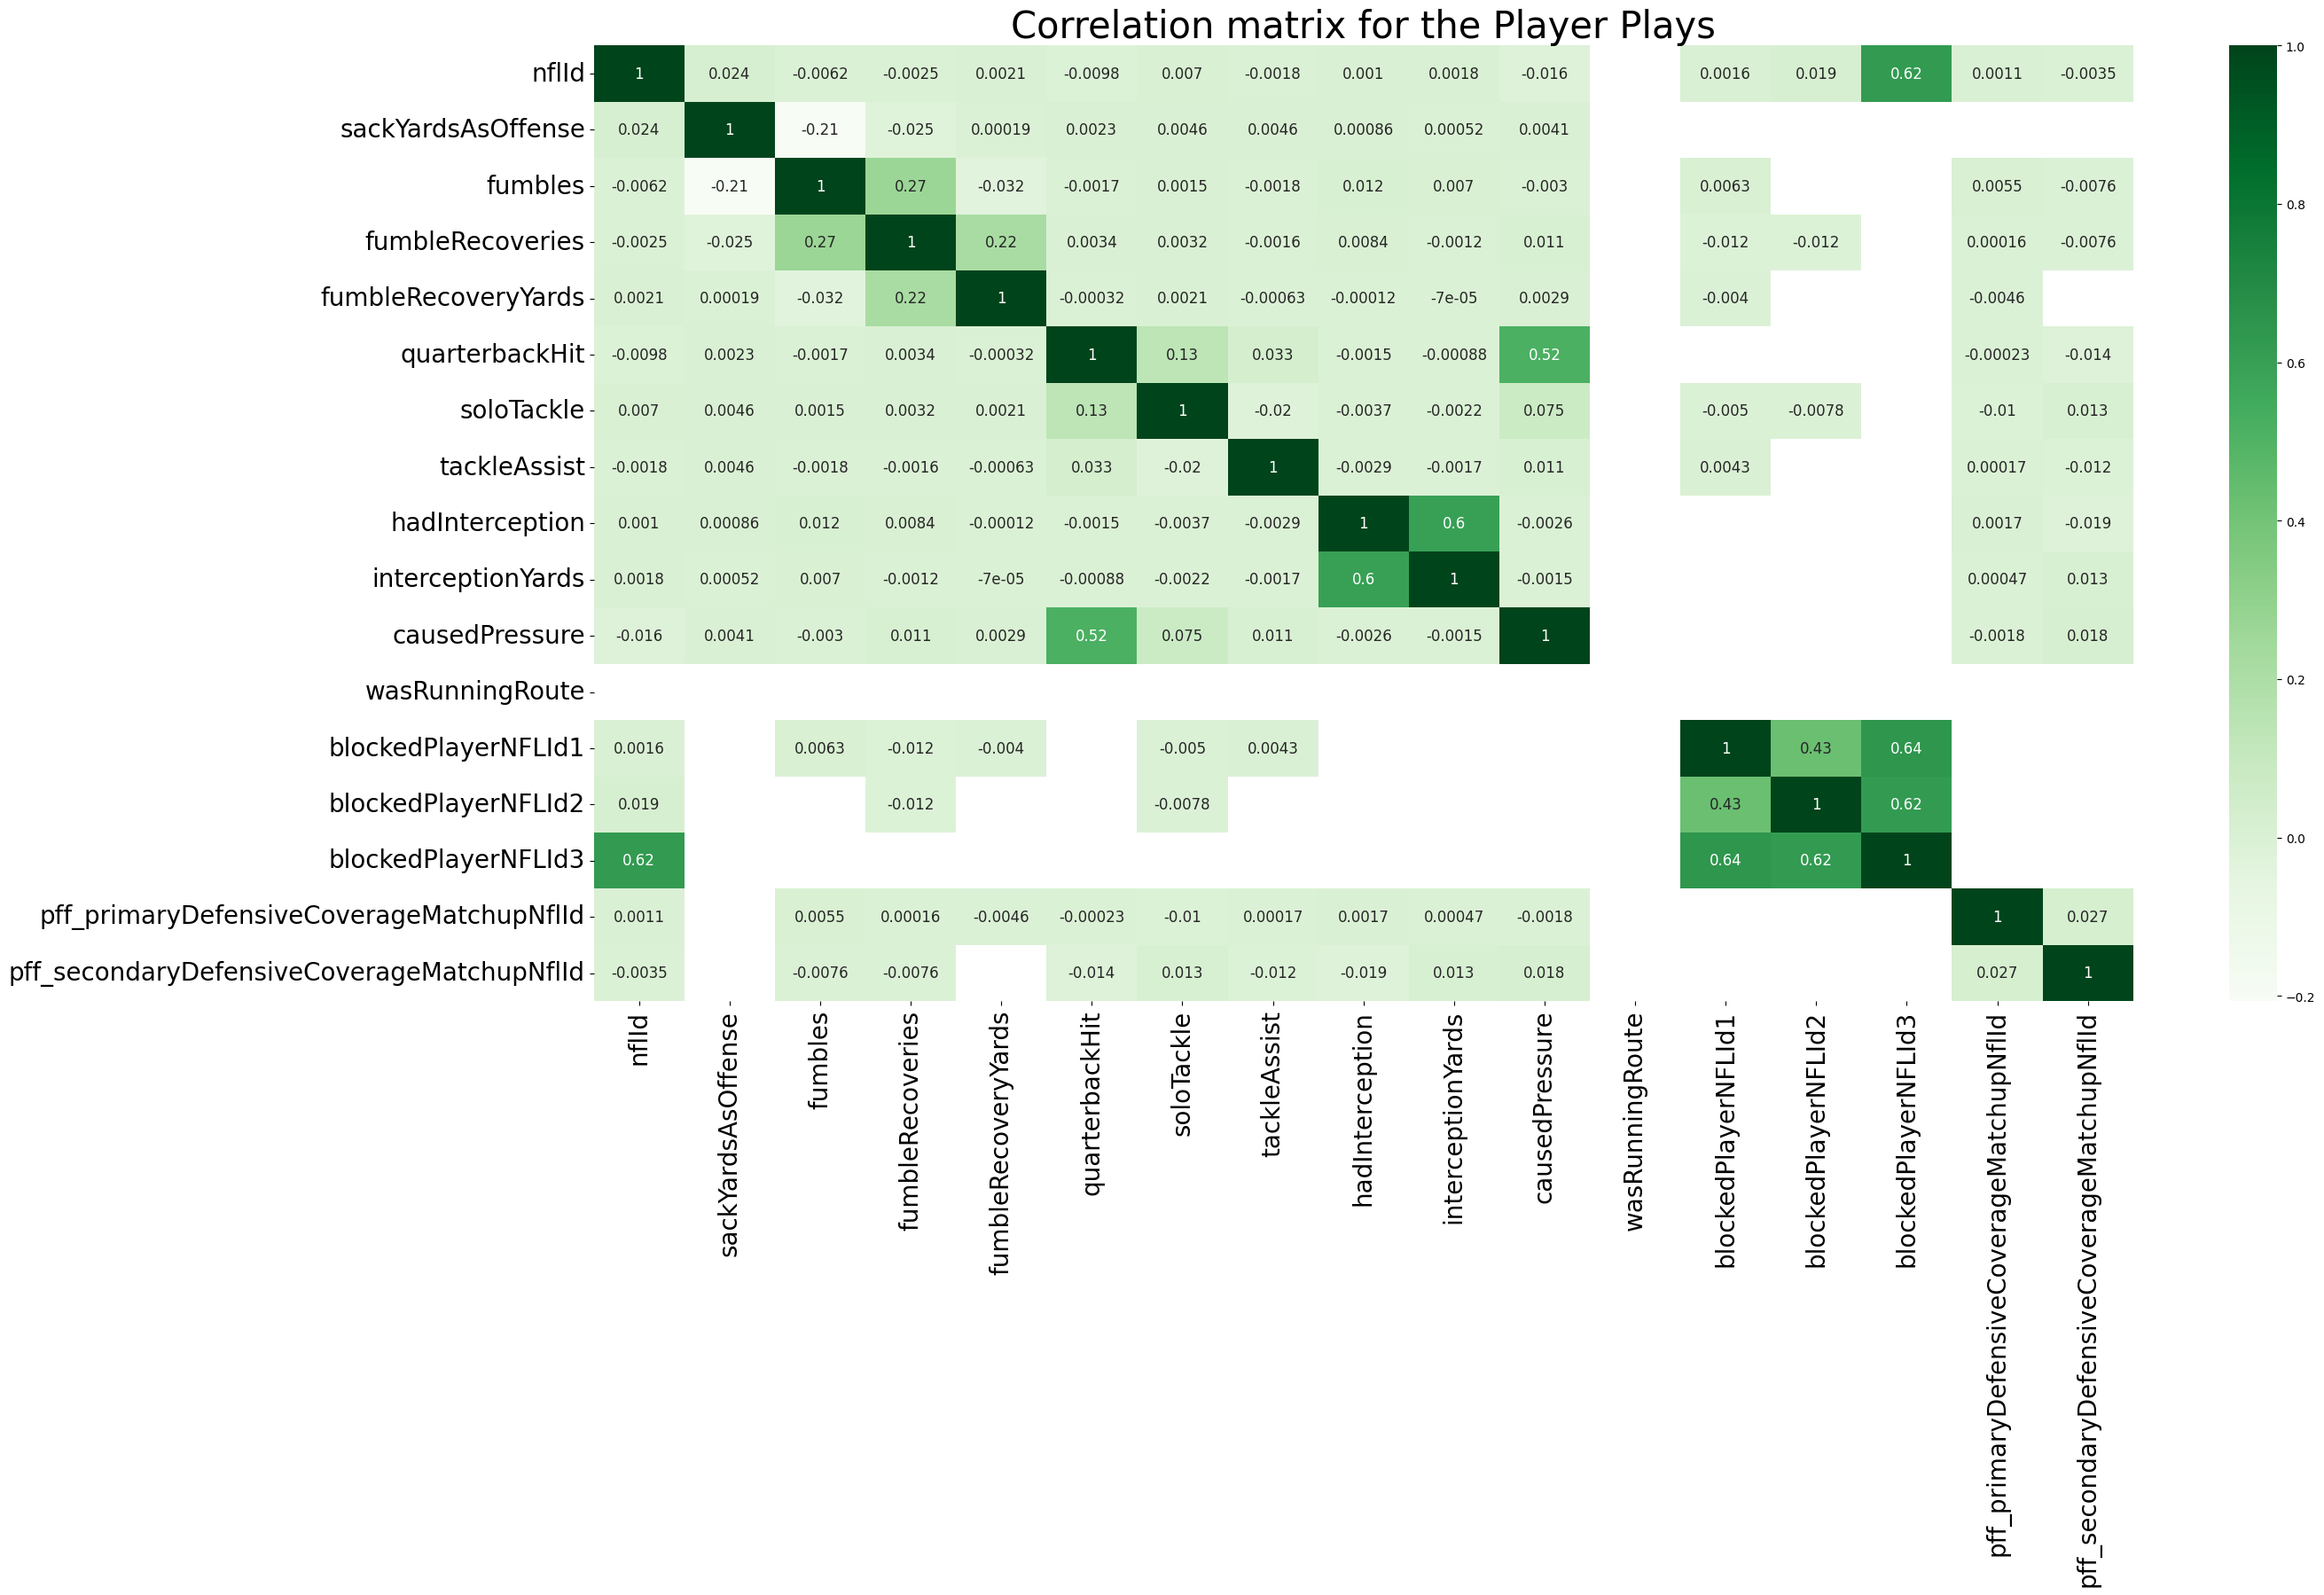

In [63]:
# finding correlation between vars
# Create a new dataframe
continuous_df_playerplays = df_playerplays_subset[continous_features_playerplays]
correlation_playerplays = continuous_df_playerplays.corr()
correlation_playerplays

plt.figure(figsize=(28,14))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(correlation_playerplays, cmap="Greens", annot=True, annot_kws={'size':12})
plt.title("Correlation matrix for the Player Plays", fontsize=30)

In [64]:
hadInterception = (df_playerplays_subset['hadInterception'].value_counts(normalize=True)*100).round(2)
hadInterception

hadInterception
0    99.95
1     0.05
Name: proportion, dtype: float64

In [65]:
# Filter interceptions where 'hadInterception' is 1
filtered_interceptions = df_playerplays_subset[df_playerplays_subset['hadInterception'] == 1]

# Group by 'teamAbbr' and count the number of interceptions
team_interceptions = filtered_interceptions.groupby('teamAbbr')['hadInterception'].count().reset_index()

# Rename the columns for clarity
team_interceptions.columns = ['teamAbbr', 'interceptionCount']

# Sort by the number of interceptions in descending order
team_interceptions = team_interceptions.sort_values(by='interceptionCount', ascending=False)

# Display the result
print(team_interceptions)

   teamAbbr  interceptionCount
25      PHI                 12
24      NYJ                 11
21       NE                 10
3       BUF                 10
2       BAL                  9
5       CHI                  9
30      TEN                  8
6       CIN                  8
26      PIT                  8
1       ATL                  7
20      MIN                  7
17      LAC                  7
14      JAX                  7
0       ARI                  6
9       DEN                  6
29       TB                  6
27      SEA                  5
16       LA                  5
12      HOU                  5
11       GB                  5
10      DET                  5
8       DAL                  5
4       CAR                  5
19      MIA                  4
13      IND                  4
28       SF                  4
18       LV                  3
15       KC                  3
7       CLE                  3
31      WAS                  3
22       NO                  2
23      

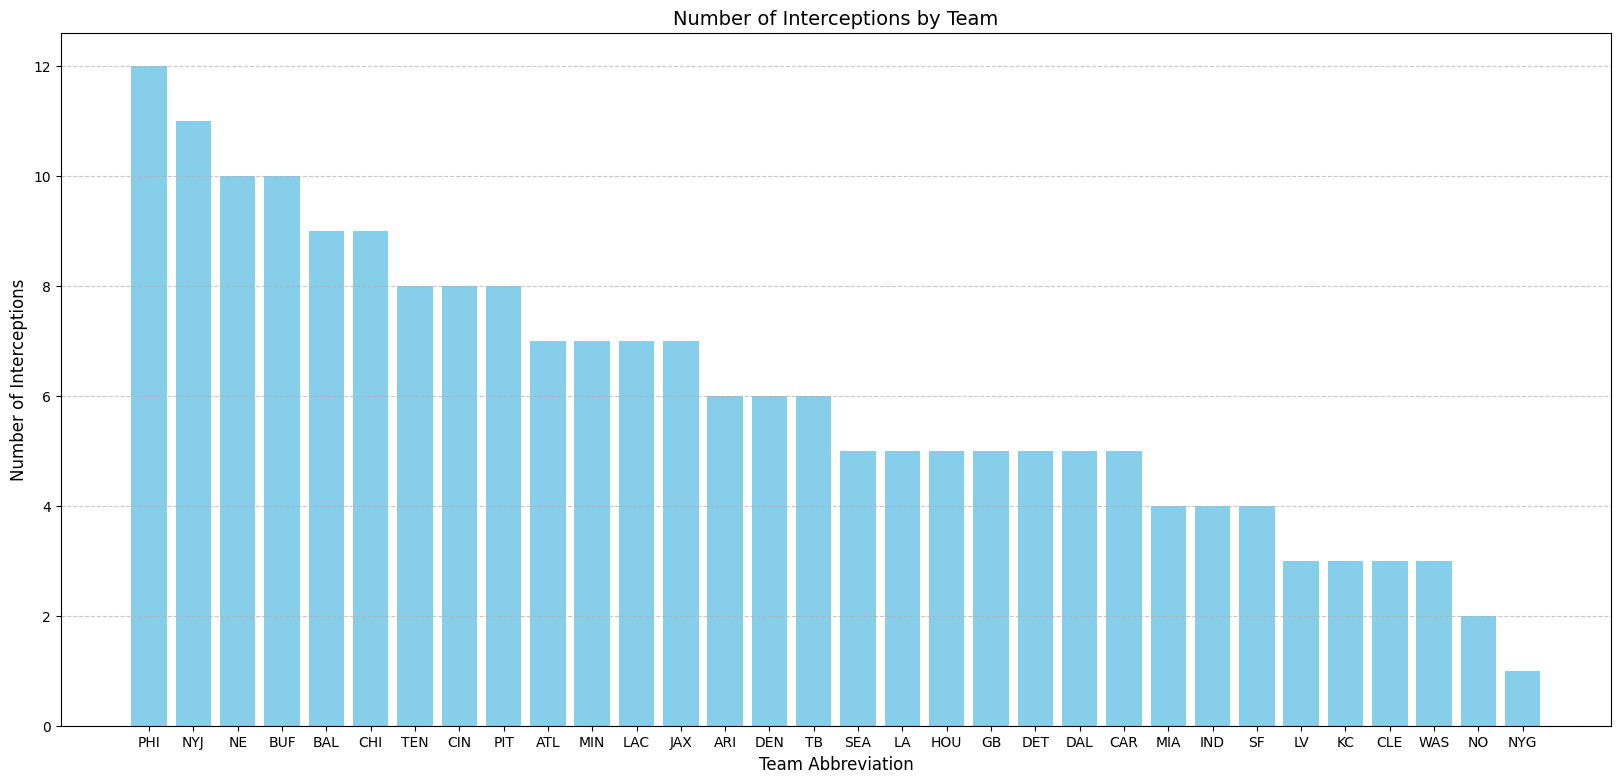

In [66]:
# Plotting
plt.figure(figsize=(20, 9))
plt.bar(team_interceptions['teamAbbr'], team_interceptions['interceptionCount'], color='skyblue')
plt.title('Number of Interceptions by Team', fontsize=14)
plt.xlabel('Team Abbreviation', fontsize=12)
plt.ylabel('Number of Interceptions', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [67]:
# Filter interceptions where 'hadInterception' is 1
filtered_interceptions = df_playerplays_subset[df_playerplays_subset['hadInterception'] == 1]

# Group by 'teamAbbr' and select specific fields
grouped_fields = filtered_interceptions.groupby('teamAbbr')[['interceptionYards', 'playId', 'gameId', 'nflId', 'teamAbbr', 'penaltyNames', 'causedPressure','blockedPlayerNFLId1','blockedPlayerNFLId2','blockedPlayerNFLId3','pff_primaryDefensiveCoverageMatchupNflId','pff_secondaryDefensiveCoverageMatchupNflId']]

# Example aggregation: sum for 'interceptionYards' and count for 'playId'
aggregated_data = grouped_fields.agg({
    'interceptionYards': 'sum',  # Sum of interception yards
    'playId': 'count',           # Count of plays
    'gameId': 'nunique'          # Unique games
}).reset_index()

# Sort by multiple columns: first by 'interceptionYards' in descending order, then by 'gameId'
aggregated_data = aggregated_data.sort_values(by=['interceptionYards', 'gameId'], ascending=[False, True])

# Display the result
print(aggregated_data)

   teamAbbr  interceptionYards  playId  gameId
0       ARI                148       6       3
5       CHI                143       9       6
29       TB                140       6       4
21       NE                137      10       7
25      PHI                127      12       7
4       CAR                117       5       4
6       CIN                117       8       5
26      PIT                115       8       4
1       ATL                112       7       5
30      TEN                108       8       7
15       KC                106       3       2
28       SF                 96       4       4
17      LAC                 95       7       4
14      JAX                 95       7       5
18       LV                 93       3       3
11       GB                 93       5       4
2       BAL                 83       9       6
16       LA                 81       5       3
12      HOU                 78       5       5
19      MIA                 75       4       2
20      MIN  

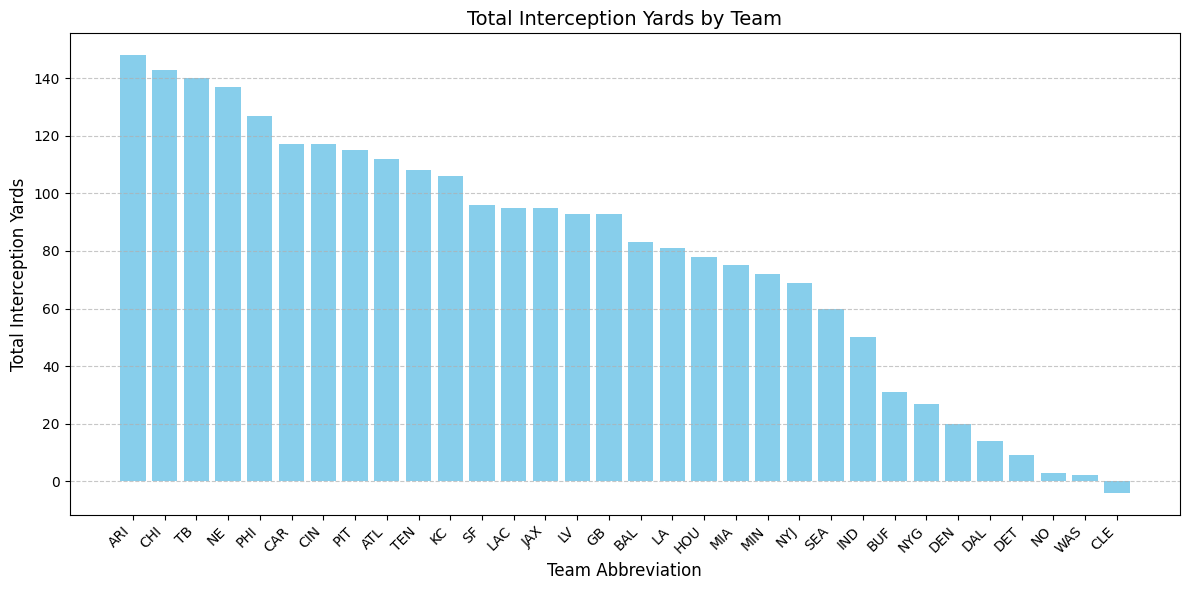

In [68]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(aggregated_data['teamAbbr'], aggregated_data['interceptionYards'], color='skyblue')
plt.title('Total Interception Yards by Team', fontsize=14)
plt.xlabel('Team Abbreviation', fontsize=12)
plt.ylabel('Total Interception Yards', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align x-axis labels
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Analysis on the player play data
1. There are 354477 entries in the file
2. The correlations (0.43, 0.64, 0.62) reveal moderate relationships between primary, secondary, and tertiary blocking opponents. This likely reflects the overlapping responsibilities of certain players in blocking multiple opponents during plays, influenced by player roles, skill sets, and play design. (From correlation matrix)
3. There is a moderate positive correlation of between interceptions and interception yards (0.6), suggests that as the number of interceptions increases, the number of yards gained on those interceptions tends to increase as well. while not perfectly predictive, this suggests a meaningful trend between these variables.(From correlation matrix)
4. A correlation of 0.52 between causedPressure and quarterbackHit indicates a moderate positive correlation. This means that as the number of causedPressures increases, the number of quarterbackHits tends to increase as well, but the relationship is not extremely strong.(From correlation matrix)
5. There are 0.05% recorded interceptions of which PHI has the recorded the most number of interceptions at 12, and NYG at 1. ARI had the most interception yards of 148

# Analysis on the player Nick Bosa

No game data available for Nick Bosa in /kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv
Game Details: DEN (11) vs SF (10)


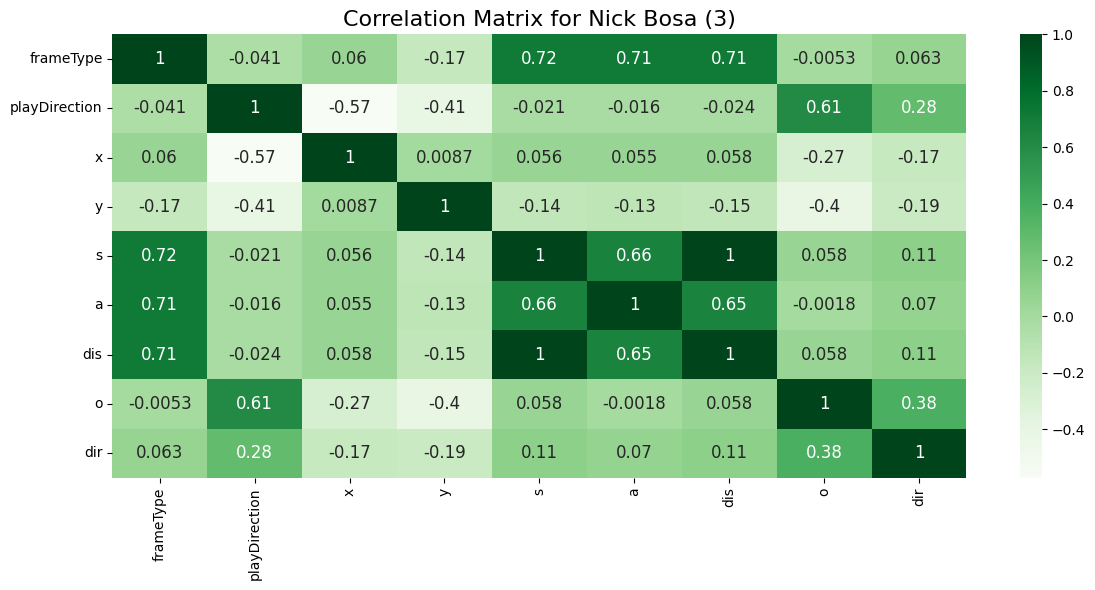

Game Details: SF (24) vs LA (9)


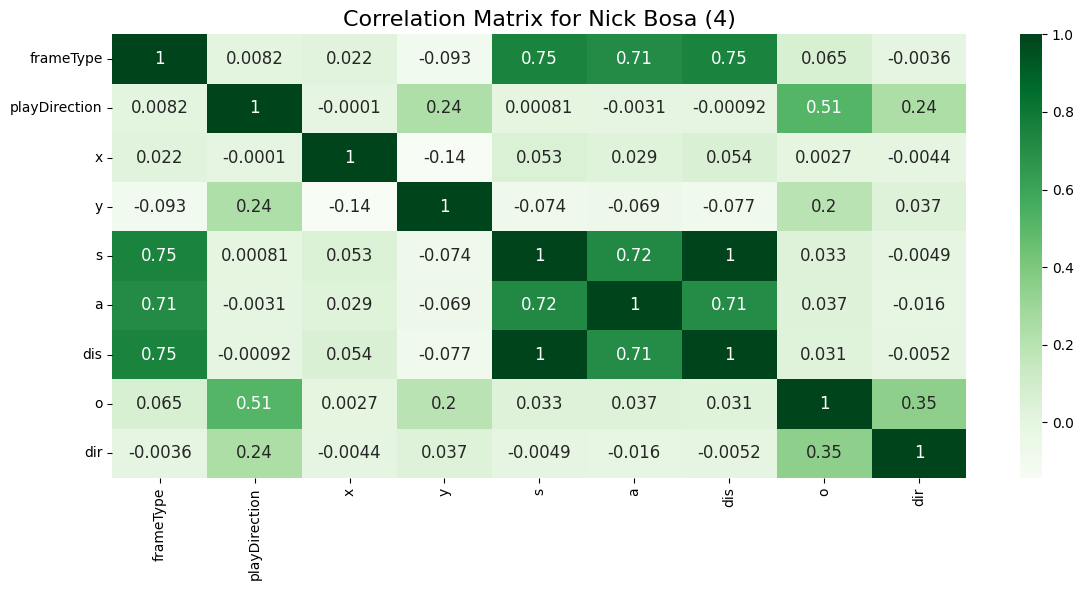

Game Details: CAR (15) vs SF (37)


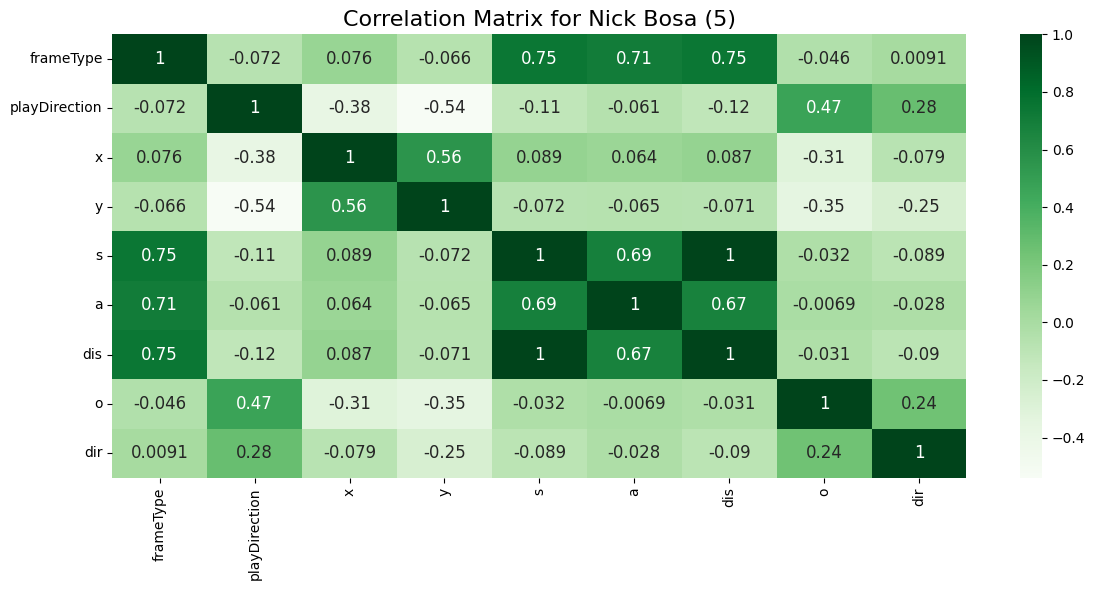

No game data available for Nick Bosa in /kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv
Game Details: SF (23) vs KC (44)


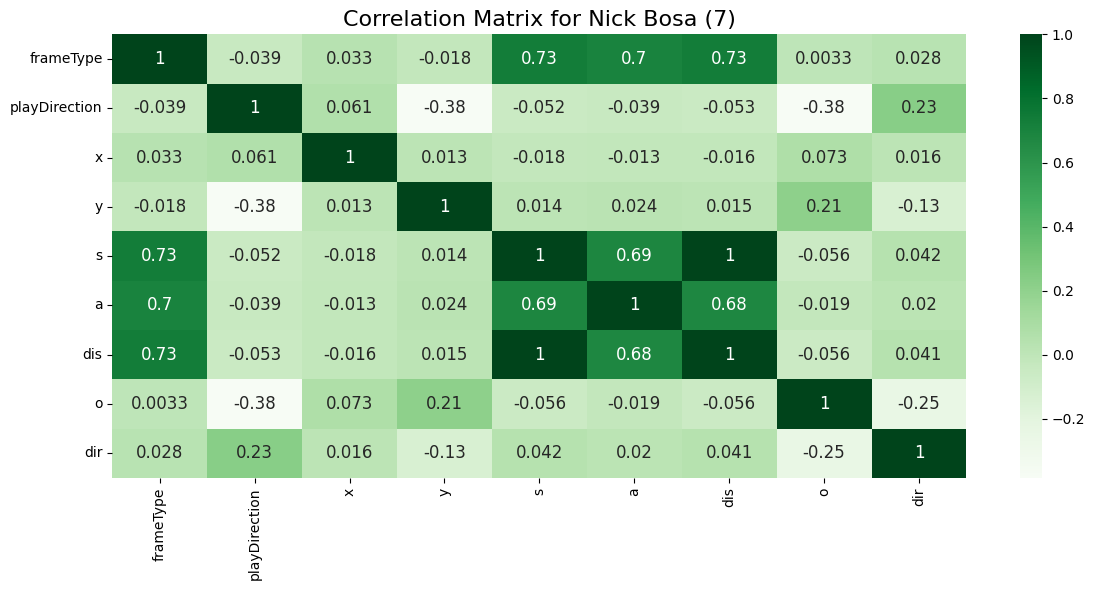

Game Details: LA (14) vs SF (31)


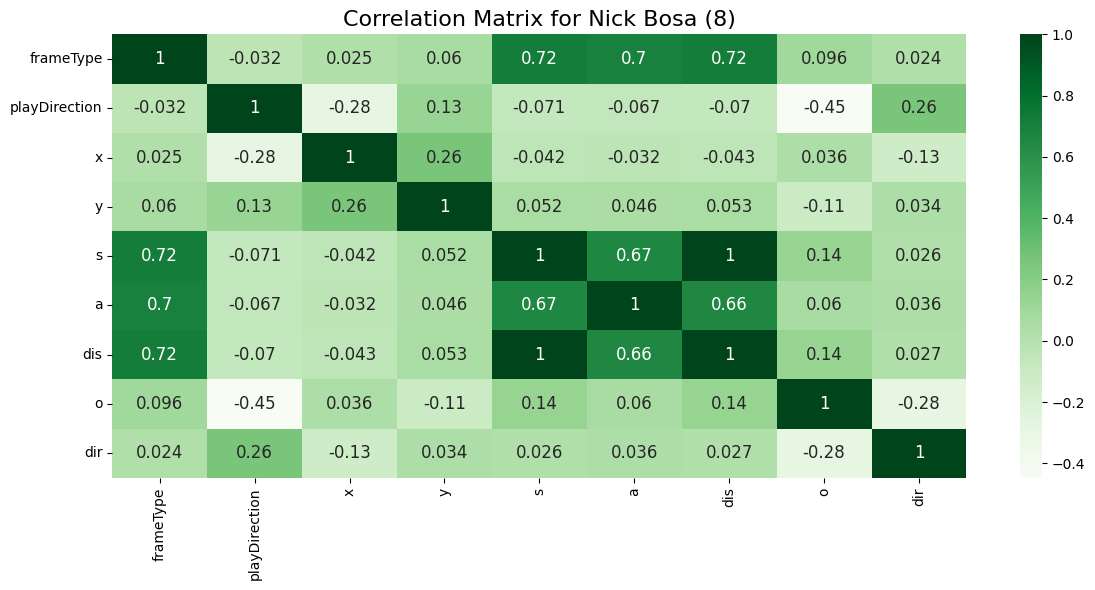

No game data available for Nick Bosa in /kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv


In [69]:
# Updated function to include home and away team with final scores
def analyze_nick_bosa_correlation(week_file, df_games):
    # Load week-specific tracking data
    df_tracking_week = pd.read_csv(week_file)
    
    # Filter for Nick Bosa's records
    filtered_week = df_tracking_week[df_tracking_week['displayName'] == 'Nick Bosa']
    
    # Merge with game data to find the team Nick Bosa was playing against
    filtered_jersey97 = pd.merge(df_games, filtered_week, on='gameId', how='inner')
    
    # Check if merged data is empty
    if filtered_jersey97.empty:
        print(f"No game data available for Nick Bosa in {week_file}")
        return
    
    # Display home and away team with final scores
    home_team = filtered_jersey97['homeTeamAbbr'].iloc[0]
    away_team = filtered_jersey97['visitorTeamAbbr'].iloc[0]
    home_score = filtered_jersey97['homeFinalScore'].iloc[0]
    away_score = filtered_jersey97['visitorFinalScore'].iloc[0]
    print(f"Game Details: {home_team} ({home_score}) vs {away_team} ({away_score})")
    
    # Convert categorical columns to numeric for correlation analysis
    filtered_jersey97['playDirection'] = filtered_jersey97['playDirection'].map({'left': 0, 'right': 1}).astype(float)
    filtered_jersey97['frameType'] = filtered_jersey97['frameType'].map({'BEFORE_SNAP': 0, 'AFTER_SNAP': 1, 'SNAP': 2}).astype(float)
    
    # Find continuous features for correlation
    continuous_features = [
        col for col in filtered_jersey97.select_dtypes(include=['number']).columns
        if col not in ['gameId', 'playId', 'nflId', 'displayName', 'time', 'club', 'event', 'season', 'week', 'homeFinalScore', 'visitorFinalScore', 'frameId', 'jerseyNumber']
    ]
    
    # Create a dataframe with continuous features
    continuous_df = filtered_jersey97[continuous_features]
    
    # Calculate the correlation matrix
    correlation_matrix = continuous_df.corr()
    
    # Plot the correlation matrix
    plt.figure(figsize=(12, 6))
    sns.heatmap(correlation_matrix, cmap="Greens", annot=True, annot_kws={'size': 12})
    plt.title(f"Correlation Matrix for Nick Bosa ({week_file.split('_')[-1].split('.')[0]})", fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

# Week 1 and game file
#analyze_nick_bosa_correlation("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv", df_games)
analyze_nick_bosa_correlation("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv", df_games)
analyze_nick_bosa_correlation("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv", df_games)
analyze_nick_bosa_correlation("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv", df_games)
analyze_nick_bosa_correlation("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv", df_games)
analyze_nick_bosa_correlation("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv", df_games)
analyze_nick_bosa_correlation("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv", df_games)
analyze_nick_bosa_correlation("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv", df_games)
analyze_nick_bosa_correlation("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv", df_games)


# Analysis on the player Nick Bosa
I ran an analysis on Nick Bosa. 
The 49ers are no longer in the playoffs for season 2024-2025. I was sad to see this. 
It has also made me realize that the offense should be as good as the defense. We had quite a few injuries this season. As I was watching one of the games, the 49ers were doing well for themselves, but Nick Bosa was injured during one of the plays and couldn't play the second half. The 49ers did end up losing, which I felt was due to the fact that Nick Bosa was not playing. It made such a difference. Maybe the coaches should do some pairing-coaching, in terms of coaching a backup as good as Nick Bosa, so they are not in this position? What is it that Nick does, that makes so much difference?


1. There are 16 games in each tracking_week file
2. There is one game for Nick Bosa in week 1, with 6644 records. SF versus CHI, CHI won 19 to 10.
3. There is strong correlation between 'frameType' having values BEFORE_SNAP/AFTER_SNAP/SNAP, with 'speed' and 'acceleration' (0.69 and 0.7), makes sense as the players are stationary prior to the snap - From correlation matrix
4. Moderate positive correlation with o (orientation) (0.59) and 'playDirection' having values LEFT/RIGHT suggesting the orientation is influenced by players direction - From correlation matrix
5. Strong correlations between s, a, and dis (0.61-0.62), makes sense as greater the speed and acceleration, greater the distance traveled - From correlation matrix